In [2]:
import pandas as pd
import numpy as np

# Data research

In [18]:
df_dev = pd.read_csv('/docker_disk/risk-model/data/01_raw/cs-training.csv')
df_validate = pd.read_csv('/docker_disk/risk-model/data/01_raw/cs-test.csv')
df_to_send_example = pd.read_csv('/docker_disk/risk-model/data/01_raw/sampleEntry.csv')

In [19]:
df_dev.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [20]:
df_validate.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [21]:
df_to_send_example.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [22]:
df_dev.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [23]:
df_dev.isna().mean()

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [32]:
df_dev.shape

(150000, 12)

In [45]:
df_validate.shape

(101503, 12)

In [24]:
df_validate.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [26]:
df_validate.isna().mean()

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198053
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025871
dtype: float64

In [39]:
def get_index(df:pd.DataFrame, col_to_index:str, index_name:str)->pd.DataFrame:
    df_indexed = df.rename(columns={col_to_index:index_name}).set_index(index_name)
    return df_indexed

In [41]:
df_dev_indexed = get_index(df_dev,'Unnamed: 0', 'Id' )
df_dev_indexed

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0


In [43]:
df_validate_indexed = get_index(df_validate,'Unnamed: 0', 'Id' )
df_validate_indexed

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN


# Feature creation

In [456]:
def _get_killer_feature(df):
    df_ = df.copy(deep=True)
    for x in ['flag_bad_utilization', 'flag_bad_dlq', 'flag_bad_noopencreds']:
        df_[x+'_modified'] = x +'='+ df_[x].astype(str) + '&'
    df_['feat_killer'] = df_[[x for x in df_ if '_modified' in x]].sum(axis=1)
    return df_['feat_killer']


def get_extra_features(df):
    df['Debt'] =df['DebtRatio']*df['MonthlyIncome'].fillna(1)
    df['NumberOfTime30+DaysPastDueNotWorse'] = df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']].sum(axis=1)
    df['avg_debt_per_credit'] =  np.where( df['NumberOfOpenCreditLinesAndLoans']>0, df['Debt']/df['NumberOfOpenCreditLinesAndLoans'], np.nan)

    df['flag_bad_utilization'] = np.where(df['RevolvingUtilizationOfUnsecuredLines']>1, 1, 0)
    df['flag_bad_dlq'] = np.where(df['NumberOfTime30+DaysPastDueNotWorse']>1, 1, 0)
    df['flag_bad_noopencreds'] = np.where(df['NumberOfOpenCreditLinesAndLoans']== 0, 1, 0)
    df['feat_killer'] = _get_killer_feature(df)
    return df






    

In [457]:
df_dev_indexed_feats = get_extra_features(df_dev_indexed)

In [458]:
df_dev_indexed_feats

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,flag_bad_utilization,flag_bad_dlq,flag_bad_noopencreds,feat_killer
Id,,,,,,,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,7323.197016,2,563.322847,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,316.878123,0,79.219531,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,258.914887,2,129.457443,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,118.963951,0,23.792790,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1584.975094,1,226.425013,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,472.774869,0,118.193717,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,4001.283436,0,1000.320859,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,3870.000000,0,215.000000,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...


In [459]:
df_validate_indexed_feats = get_extra_features(df_validate_indexed)

In [460]:
df_validate_indexed_feats

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,flag_bad_utilization,flag_bad_dlq,flag_bad_noopencreds,feat_killer
Id,,,,,,,,,,,,,,,,,,
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,1011.822487,0,252.955622,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,4819.472759,0,321.298184,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,3495.312354,0,291.276030,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,2963.074038,1,423.296291,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,76.980082,0,19.245021,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0,95.931478,0,19.186296,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0,7114.065783,3,889.258223,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN,836.000000,0,278.666667,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...


# Binning

In [3]:
from optbinning import BinningProcess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
def get_train_test(pd.DataFrame, pd.Series, test_size:float, random_state:int)->pd.DataFrame:
    X_train, X_test, y_train, y_test = train_test_split(
    df_dev_indexed_feats[[x for x in df_dev_indexed_feats.columns if x!='SeriousDlqin2yrs' ]], df_dev_indexed_feats.SeriousDlqin2yrs, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


In [461]:
X_train, X_test, y_train, y_test = train_test_split(
    df_dev_indexed_feats[[x for x in df_dev_indexed_feats.columns if x!='SeriousDlqin2yrs' ]], df_dev_indexed_feats.SeriousDlqin2yrs, test_size=0.33, random_state=1234)

In [462]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Debt', 'NumberOfTime30+DaysPastDueNotWorse',
       'avg_debt_per_credit', 'flag_bad_utilization', 'flag_bad_dlq',
       'flag_bad_noopencreds', 'feat_killer'],
      dtype='object')

In [463]:
var_names = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Debt', 'NumberOfTime30+DaysPastDueNotWorse', 'avg_debt_per_credit', 'feat_killer' ]

In [464]:
X_train.feat_killer.value_counts()

flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&    89637
flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&     7406
flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&     1180
flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&     1041
flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&      883
flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&      346
flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&        4
flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&        3
Name: feat_killer, dtype: int64

In [465]:
pd.pivot_table(df_dev_indexed_feats, index=['feat_killer'], values='SeriousDlqin2yrs', aggfunc=['count', 'mean'])

,count,mean
,SeriousDlqin2yrs,SeriousDlqin2yrs
feat_killer,,
flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&,133724,0.035528
flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&,1365,0.175824
flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&,11075,0.320993
flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&,515,0.471845
flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&,1786,0.212206
flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&,5,0.000000
flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&,1527,0.561231
flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&,3,0.333333


In [502]:
user_splits_feat_killer= np.array([
['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&'],
['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&'],
['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&'],

['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&' ]
],dtype=object)

In [503]:
user_splits_feat_killer

array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&'])],
      dtype=object)

In [467]:
binning_fit_params={}
binning_fit_params['feat_killer'] = {
    'user_splits':user_splits_feat_killer,
    'user_splits_fixed': [True,  True, True, True]
    #'monotonic_trend': 'auto_asc_desc'    
    }

In [538]:
def binning(df_X_train:pd.DataFrame, 
            series_y_train:pd.Series, 
            variable_names:list, 
            categorical_variables:list,
            manual_cols_to_bin_splits:dict,
            ):
    binning_fit_params={}
    if len(manual_cols_to_bin_splits)>0:
        for feat in manual_cols_to_bin_splits.keys():
            binning_fit_params[feat] = {
                'user_splits': np.array(manual_cols_to_bin_splits[feat][0], dtype=object),
                'user_splits_fixed': manual_cols_to_bin_splits[feat][1]
            }
    else:
        pass
    
    bp = BinningProcess(variable_names=variable_names, 
                        categorical_variables=categorical_variables, 
                        binning_fit_params=binning_fit_params)
                        
    bp.fit(df_X_train[variable_names], series_y_train)

    return bp

In [539]:
bp = binning(X_train, y_train, var_names, categorical_variables= ['feat_killer'],  
manual_cols_to_bin_splits = dict_test)

In [533]:
dict_test

{'feat_killer': [['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&'],
  ['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&',
   'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&',
   'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&'],
  ['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&'],
  ['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&',
   'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&',
   'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&']]}

In [531]:
bp.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,RevolvingUtilizationOfUnsecuredLines,numerical,OPTIMAL,True,9,1.103435,0.129002,0.550069,0.078887
1,age,numerical,OPTIMAL,True,13,0.247929,0.030155,0.266161,0.06418
2,NumberOfTime30-59DaysPastDueNotWorse,numerical,OPTIMAL,True,3,0.730531,0.083827,0.373414,0.194107
3,DebtRatio,numerical,OPTIMAL,True,8,0.076287,0.009435,0.140361,0.069217
4,MonthlyIncome,numerical,OPTIMAL,True,9,0.084096,0.010434,0.162747,0.059066
5,NumberOfOpenCreditLinesAndLoans,numerical,OPTIMAL,True,9,0.076655,0.009439,0.131937,0.086861
6,NumberOfTimes90DaysLate,numerical,OPTIMAL,True,2,0.827181,0.087874,0.308549,0.053938
7,NumberRealEstateLoansOrLines,numerical,OPTIMAL,True,4,0.054017,0.006736,0.120432,0.178578
8,NumberOfTime60-89DaysPastDueNotWorse,numerical,OPTIMAL,True,2,0.562093,0.061201,0.239517,0.110152
9,NumberOfDependents,numerical,OPTIMAL,True,4,0.028749,0.003584,0.087988,0.085201


In [514]:
var_names

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Debt',
 'NumberOfTime30+DaysPastDueNotWorse',
 'avg_debt_per_credit',
 'feat_killer']

In [534]:
splits = [[
          ['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&'],
          ['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&'],
          ['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&'],
          ['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&' ]
          ], [True, True, True, True]]

In [535]:
dict_test = {'feat_killer': splits}

In [537]:
dict_test['feat_killer'][0]

[['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&'],
 ['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&',
  'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&',
  'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&'],
 ['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&'],
 ['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&',
  'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&',
  'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&']]

In [509]:
dict_test.keys()

dict_keys(['feat_killer'])

In [504]:
len([])

0

In [468]:
bp = BinningProcess(variable_names=var_names, categorical_variables=['feat_killer'], binning_fit_params=binning_fit_params )

In [469]:
bp.fit(X_train[var_names], y_train)

BinningProcess(binning_fit_params={'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&']),
       list(['...
               variable_names=['RevolvingUtilizationOfUnsecuredLines', 'age',
                               'NumberOfTime30-59DaysPastDueNotWorse',
                               'DebtRatio', 'MonthlyIncome',
                               'NumberOfOpenCreditLinesAndLoans',
                               'NumberOfTimes90DaysLate',
                               'NumberRealEstateLoansOrLines',
                               'NumberOfTime60-89DaysPastDueNotWorse',
                               'NumberOfDependents', 'Debt',
                               'NumberOfTime30+DaysPastDueNotWorse',
                               'avg_debt_per_credit', 'feat_killer'])

In [470]:
bp.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,RevolvingUtilizationOfUnsecuredLines,numerical,OPTIMAL,True,9,1.103435,0.129002,0.550069,0.078887
1,age,numerical,OPTIMAL,True,13,0.247929,0.030155,0.266161,0.06418
2,NumberOfTime30-59DaysPastDueNotWorse,numerical,OPTIMAL,True,3,0.730531,0.083827,0.373414,0.194107
3,DebtRatio,numerical,OPTIMAL,True,8,0.076287,0.009435,0.140361,0.069217
4,MonthlyIncome,numerical,OPTIMAL,True,9,0.084096,0.010434,0.162747,0.059066
5,NumberOfOpenCreditLinesAndLoans,numerical,OPTIMAL,True,9,0.076655,0.009439,0.131937,0.086861
6,NumberOfTimes90DaysLate,numerical,OPTIMAL,True,2,0.827181,0.087874,0.308549,0.053938
7,NumberRealEstateLoansOrLines,numerical,OPTIMAL,True,4,0.054017,0.006736,0.120432,0.178578
8,NumberOfTime60-89DaysPastDueNotWorse,numerical,OPTIMAL,True,2,0.562093,0.061201,0.239517,0.110152
9,NumberOfDependents,numerical,OPTIMAL,True,4,0.028749,0.003584,0.087988,0.085201


In [471]:
X_train_woe = bp.transform(X_train[bp.variable_names], metric='woe', metric_missing='empirical' )
X_test_woe = bp.transform(X_test[bp.variable_names], metric='woe', metric_missing='empirical' )
X_validate_woe = bp.transform(df_validate_indexed_feats[bp.variable_names], metric='woe', metric_missing='empirical' )

In [ ]:
def get_woe_binned_features(df:pd.DataFrame, bp, metric:str, metric_missing:str ):
    """
    transformation to binned
    """
    df_woe = bp.transform(df[bp.variable_names], metric=metric, metric_missing=metric_missing )
    return df_woe
 


In [479]:
bp.variable_names

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Debt',
 'NumberOfTime30+DaysPastDueNotWorse',
 'avg_debt_per_credit',
 'feat_killer']

In [480]:
X_dev_woe = bp.transform(df_dev_indexed[bp.variable_names], metric='woe', metric_missing='empirical' )
X_dev_woe

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,feat_killer
Id,,,,,,,,,,,,,,
1,-0.849902,-0.207740,-1.906763,-0.640343,0.278369,0.113931,0.385057,-0.223238,0.285265,-0.199244,-0.442829,-2.035856,-0.219074,-1.884888
2,-1.385751,-0.305992,0.533430,0.105503,-0.405582,0.054586,0.385057,-0.237329,0.285265,-0.081579,0.001238,0.927038,0.058429,0.657791
3,-0.359879,-0.305992,-0.873570,0.105503,-0.405582,-0.690735,-2.295820,-0.237329,0.285265,0.121467,0.001238,-2.035856,0.058429,-1.884888
4,0.608288,-0.537419,0.533430,0.105503,-0.405582,0.054586,0.385057,-0.237329,0.285265,0.121467,0.001238,0.927038,0.058429,0.657791
5,-1.385751,-0.146406,-0.873570,0.105503,0.511938,0.167859,0.385057,0.258697,0.285265,0.121467,0.001238,-0.648565,-0.012698,0.657791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,1.364335,0.980021,0.533430,0.105503,-0.489821,0.054586,0.385057,0.258697,0.285265,0.121467,0.001238,0.927038,0.058429,0.657791
149997,0.608288,-0.207740,0.533430,-0.345131,-0.026922,0.054586,0.385057,0.258697,0.285265,-0.199244,-0.105629,0.927038,-0.389687,0.657791
149998,0.608288,0.263528,0.533430,0.291419,0.176166,-0.066665,0.385057,0.258697,0.285265,0.121467,-0.105629,0.927038,-0.012698,0.657791


In [481]:
y_dev = df_dev_indexed.SeriousDlqin2yrs

# Train Test model

In [ ]:
def feature_selection_(df_dev, y_dev, X_test, y_test):
    test_index = PredefinedHoldoutSplit(X_test_woe.index.to_list())
    np.bool = np.bool_ # old numpy 
    lr = LogisticRegression(random_state=1234)

    sfs1 = SFS(estimator=lr, 
           k_features=(1, X_train_woe.shape[1]),
           forward=True, 
           floating=False, 
           scoring='roc_auc',
           cv=test_index)


    sfs1.fit(X_dev_woe, y_dev)    

In [540]:
def feature_selection_logreg_predefined_test( df_dev:pd.DataFrame, 
                        y_dev:pd.Series, 
                        X_test:pd.DataFrame, 
                        y_test:pd.Series,
                        features_in: list,
                        seed:int,
                        selection_forward:bool,
                        selection_feature_metric:str
                        ):
    """
    feature selection with predefined test sample
    """
    test_index = PredefinedHoldoutSplit(X_test.index.to_list())
    np.bool = np.bool_ # old numpy
    lr = LogisticRegression(random_state=seed)
    sfs1 = SFS( estimator=lr,
                k_features=(1, X_train_woe[features_in].shape[1]),
                forward=selection_forward, 
                floating=False, 
                scoring=selection_feature_metric,
                cv=test_index)
    sfs1.fit(df_dev[features_in], y_dev)
    return sfs1


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

best combination (ACC: 0.860): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13)

all subsets:
 {1: {'feature_idx': (0,), 'cv_scores': array([0.78069394]), 'avg_score': 0.7806939381073228, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines',)}, 2: {'feature_idx': (0, 11), 'cv_scores': array([0.84813677]), 'avg_score': 0.8481367736648212, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30+DaysPastDueNotWorse')}, 3: {'feature_idx': (0, 3, 11), 'cv_scores': array([0.85248887]), 'avg_score': 0.8524888666484239, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfTime30+DaysPastDueNotWorse')}, 4: {'feature_idx': (0, 3, 6, 11), 'cv_scores': array([0.85558483]), 'avg_score': 0.8555848308795119, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfTimes90DaysLate', 'NumberOfTime30+DaysPastDueNotWorse')}, 5: {'feature_idx': (0, 3, 6, 7, 11), 'cv_scores': array([0.85708019]), 'avg_score': 0.8570801850510057, 'feature_nam

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

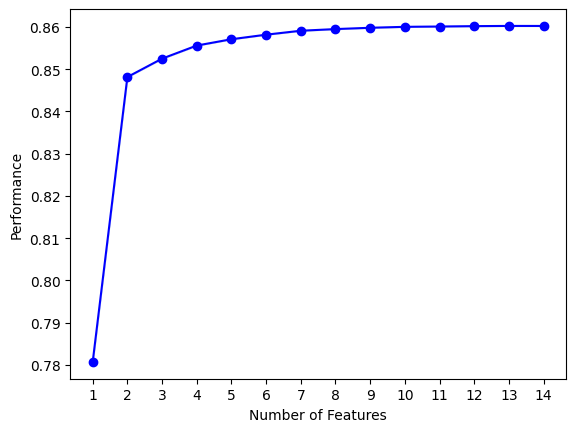

In [482]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.evaluate import PredefinedHoldoutSplit
import matplotlib.pyplot as plt

test_index = PredefinedHoldoutSplit(X_test_woe.index.to_list())
np.bool = np.bool_

lr = LogisticRegression(random_state=1234)

sfs1 = SFS(estimator=lr, 
           k_features=(1, X_train_woe.shape[1]),
           forward=True, 
           floating=False, 
           scoring='roc_auc',
           cv=test_index)


sfs1.fit(X_dev_woe, y_dev)
print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict())

In [483]:
X_train_woe[sfs1.feature_names].corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,feat_killer
RevolvingUtilizationOfUnsecuredLines,1.000000,0.275789,0.260571,0.146251,0.116707,0.217721,0.276667,0.088882,0.211934,0.100716,0.118525,0.338550,0.287190,0.383497
age,0.275789,1.000000,0.102032,0.089056,0.089328,0.067137,0.101034,0.020313,0.082964,0.270039,0.113153,0.135270,0.218542,0.129504
NumberOfTime30-59DaysPastDueNotWorse,0.260571,0.102032,1.000000,0.084048,0.033845,-0.012225,0.266807,0.000255,0.299689,0.075163,0.092635,0.869148,0.100091,0.674223
DebtRatio,0.146251,0.089056,0.084048,1.000000,0.206816,-0.143770,-0.001608,-0.166177,0.029745,0.125893,0.381561,0.070432,0.240087,0.034522
MonthlyIncome,0.116707,0.089328,0.033845,0.206816,1.000000,0.099369,0.083065,0.141679,0.054643,-0.082559,-0.246381,0.066900,-0.114541,0.075507
NumberOfOpenCreditLinesAndLoans,0.217721,0.067137,-0.012225,-0.143770,0.099369,1.000000,0.153821,0.288652,0.052567,-0.111035,-0.284710,0.064955,-0.036837,0.131006
NumberOfTimes90DaysLate,0.276667,0.101034,0.266807,-0.001608,0.083065,0.153821,1.000000,0.084153,0.315040,0.028644,-0.031224,0.555881,0.118760,0.544127
NumberRealEstateLoansOrLines,0.088882,0.020313,0.000255,-0.166177,0.141679,0.288652,0.084153,1.000000,0.035292,-0.129357,-0.271880,0.040269,-0.322788,0.074332
NumberOfTime60-89DaysPastDueNotWorse,0.211934,0.082964,0.299689,0.029745,0.054643,0.052567,0.315040,0.035292,1.000000,0.035480,0.015077,0.531996,0.078562,0.498061
NumberOfDependents,0.100716,0.270039,0.075163,0.125893,-0.082559,-0.111035,0.028644,-0.129357,0.035480,1.000000,0.200496,0.077817,0.173528,0.051341


In [484]:
sfs1.feature_names

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Debt',
 'NumberOfTime30+DaysPastDueNotWorse',
 'avg_debt_per_credit',
 'feat_killer']

In [485]:
from sklearn.metrics import roc_auc_score

In [486]:
X_train_woe.iloc[:,list(sfs1.k_feature_idx_)].columns.to_list()

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Debt',
 'NumberOfTime30+DaysPastDueNotWorse',
 'feat_killer']

In [487]:
sfs1.k_feature_names_

('RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Debt',
 'NumberOfTime30+DaysPastDueNotWorse',
 'feat_killer')

In [ ]:
def model_logreg_sfs(X_train:pd.DataFrame,
                     y_train:pd.Series,
                     sfs,
                     seed:int):
    lr = LogisticRegression(random_state=seed)
    lr.fit(X_train_woe[list(sfs.k_feature_names_)], y_train)
    return lr

In [656]:
lr = LogisticRegression(random_state=1234)

In [657]:
#X_train_sfs1 =  sfs1.transform(X_train_woe)
#X_test_sfs1 = sfs1.transform(X_test_woe)
lr.fit(X_train_woe[list(sfs1.k_feature_names_)], y_train)


LogisticRegression(random_state=1234)

In [658]:
print('train' , roc_auc_score(y_train, lr.predict_proba(X_train_woe[list(sfs1.k_feature_names_)])[:,1]))
print('test' , roc_auc_score(y_test, lr.predict_proba(X_test_woe[list(sfs1.k_feature_names_)])[:,1]))

train 0.8585238398274937
test 0.8660573054606713


In [659]:
lr.feature_names_in_

array(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'Debt', 'NumberOfTime30+DaysPastDueNotWorse', 'feat_killer'],
      dtype=object)

In [660]:
lr.coef_[0]

array([-0.5807811 , -0.38489552, -0.05030539, -0.65373161, -0.28082464,
       -0.02592664, -0.31203739, -0.52641932, -0.2148199 , -0.06828262,
       -0.87406873, -0.47438383, -0.07671242])

In [661]:
lr.coef_[0]

array([-0.5807811 , -0.38489552, -0.05030539, -0.65373161, -0.28082464,
       -0.02592664, -0.31203739, -0.52641932, -0.2148199 , -0.06828262,
       -0.87406873, -0.47438383, -0.07671242])

In [662]:
dict(zip(list(lr.feature_names_in_), lr.coef_[0]))

{'RevolvingUtilizationOfUnsecuredLines': -0.5807810979621093,
 'age': -0.3848955228641822,
 'NumberOfTime30-59DaysPastDueNotWorse': -0.050305387194714,
 'DebtRatio': -0.6537316147633175,
 'MonthlyIncome': -0.2808246413221,
 'NumberOfOpenCreditLinesAndLoans': -0.025926635745231044,
 'NumberOfTimes90DaysLate': -0.31203739227878763,
 'NumberRealEstateLoansOrLines': -0.5264193182910119,
 'NumberOfTime60-89DaysPastDueNotWorse': -0.21481990429032966,
 'NumberOfDependents': -0.06828262402545689,
 'Debt': -0.8740687292645599,
 'NumberOfTime30+DaysPastDueNotWorse': -0.47438382814440294,
 'feat_killer': -0.07671241904742185}

In [493]:
t=[]
for feature in list(lr.feature_names_in_):
    t.append(bp.get_binned_variable(feature).binning_table.build(show_digits=4))
table=pd.concat(t , keys=list(lr.feature_names_in_))
table

Bin  \
RevolvingUtilizationOfUnsecuredLines 0                                          (-inf, 0.0608)   
                                     1                                        [0.0608, 0.1323)   
                                     2                                        [0.1323, 0.2178)   
                                     3                                        [0.2178, 0.3009)   
                                     4                                        [0.3009, 0.3898)   
...                                                                                        ...   
feat_killer                          2       [flag_bad_utilization=0&flag_bad_dlq=1&flag_ba...   
                                     3       [flag_bad_utilization=0&flag_bad_dlq=1&flag_ba...   
                                     4                                                 Special   
                                     5                                                 Missing   
                                     Totals                                                      

                                              Count  Count (%)  Non-event  \
RevolvingUtilizationOfUnsecuredLines 0        35312   0.351363      34676   
                                     1        12459   0.123970      12197   
                                     2         8632   0.085891       8363   
                                     3         6038   0.060080       5811   
                                     4         5177   0.051512       4904   
...                                             ...        ...        ...   
feat_killer                          2         7406   0.073692       5029   
                                     3         1390   0.013831        647   
                                     4            0   0.000000          0   
                                     5            0   0.000000          0   
                                     Totals  100500   1.000000      93770   

                                             Event  Event rate       WoE  \
RevolvingUtilizationOfUnsecuredLines 0         636    0.018011  1.364335   
                                     1         262    0.021029  1.206331   
                                     2         269    0.031163  0.802591   
                                     3         227    0.037595  0.608288   
                                     4         273    0.052733  0.254065   
...                                            ...         ...       ...   
feat_killer                          2        2377    0.320956 -1.884888   
                                     3         743    0.534532  -2.77262   
                                     4           0    0.000000       0.0   
                                     5           0    0.000000       0.0   
                                     Totals   6730    0.066965             

                                                   IV        JS  
RevolvingUtilizationOfUnsecuredLines 0       0.375596  0.043617  
                                     1       0.109949  0.012967  
                                     2       0.039500  0.004809  
                                     3       0.017179  0.002115  
                                     4       0.002981  0.000372  
...                                               ...       ...  
feat_killer                          2       0.564643  0.061695  
                                     3       0.286970  0.027533  
                                     4       0.000000  0.000000  
                                     5       0.000000  0.000000  
                                     Totals  1.193152  0.130931  

[113 rows x 9 columns]

In [494]:
table.to_csv('table_woe.csv')

In [497]:
X_validate_woe['Probability'] = lr.predict_proba(X_validate_woe[lr.feature_names_in_])[:,1]
sample_to_send = X_validate_woe.reset_index()

In [501]:
sample_to_send[['Id', 'Probability']].to_csv('sampleEntry.csv', sep=',', index=False)

# End

In [156]:
from optbinning import Scorecard
from optbinning.scorecard import ScorecardMonitoring
from optbinning.scorecard import plot_auc_roc, plot_ks


In [143]:
bp

NameError: name 'bp' is not defined

In [543]:
lr

LogisticRegression(random_state=1234)

In [545]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,flag_bad_utilization,flag_bad_dlq,flag_bad_noopencreds,feat_killer
Id,,,,,,,,,,,,,,,,,
91067,0.051438,51,0,836.000000,NaN,5,0,1,0,0.0,836.000000,0,167.200000,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
37989,0.771870,55,0,356.000000,NaN,2,0,0,0,0.0,356.000000,0,178.000000,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
107399,0.657568,53,0,0.624137,3040.0,5,0,2,0,0.0,1897.375863,0,379.475173,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
18129,0.000000,28,0,0.618595,4000.0,9,0,2,0,0.0,2474.381404,0,274.931267,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
134754,0.220152,54,0,0.235064,4083.0,15,0,0,0,1.0,959.764936,0,63.984329,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41240,1.000000,72,0,0.000000,1100.0,1,0,0,0,0.0,0.000000,0,0.000000,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
55986,0.057416,80,0,0.019245,4000.0,5,0,0,0,1.0,76.980756,0,15.396151,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
32400,0.306380,34,0,0.040087,3666.0,1,0,0,0,0.0,146.959913,0,146.959913,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...


In [666]:
bp.variable_names

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Debt',
 'NumberOfTime30+DaysPastDueNotWorse',
 'avg_debt_per_credit',
 'feat_killer']

In [669]:
from copy import copy, deepcopy

In [670]:
bp_excluded = deepcopy(bp)

In [675]:
bp_excluded.variable_names = [x for x in bp.variable_names if x in sfs1.k_feature_names_]

In [688]:
bp.update_binned_variable()

TypeError: BinningProcess.update_binned_variable() missing 2 required positional arguments: 'name' and 'optb'

In [679]:
bp_excluded.information(deep=True)

TypeError: BinningProcess.information() got an unexpected keyword argument 'deep'

In [676]:

estimator = lr

scorecard = Scorecard(binning_process=bp_excluded,
                      estimator=estimator, 
                      scaling_method=None,
                      )

scorecard.fit(X_train[sfs1.k_feature_names_], y_train)

KeyError: ('RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'Debt', 'NumberOfTime30+DaysPastDueNotWorse', 'feat_killer')

In [563]:
scorecard.table(style='detailed')

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,RevolvingUtilizationOfUnsecuredLines,0,"(-inf, 0.06)",35312,0.351363,34676,636,0.018011,1.364335,0.375596,0.043617,-0.579220,-0.790249
1,RevolvingUtilizationOfUnsecuredLines,1,"[0.06, 0.13)",12459,0.123970,12197,262,0.021029,1.206331,0.109949,0.012967,-0.579220,-0.698731
2,RevolvingUtilizationOfUnsecuredLines,2,"[0.13, 0.22)",8632,0.085891,8363,269,0.031163,0.802591,0.039500,0.004809,-0.579220,-0.464877
3,RevolvingUtilizationOfUnsecuredLines,3,"[0.22, 0.30)",6038,0.060080,5811,227,0.037595,0.608288,0.017179,0.002115,-0.579220,-0.352332
4,RevolvingUtilizationOfUnsecuredLines,4,"[0.30, 0.39)",5177,0.051512,4904,273,0.052733,0.254065,0.002981,0.000372,-0.579220,-0.147159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,feat_killer,1,[flag_bad_utilization=0&flag_bad_dlq=0&flag_ba...,2067,0.020567,1670,397,0.192066,-1.197627,0.049318,0.005821,-0.076534,0.091659
2,feat_killer,2,[flag_bad_utilization=0&flag_bad_dlq=1&flag_ba...,7406,0.073692,5029,2377,0.320956,-1.884888,0.564643,0.061695,-0.076534,0.144258
3,feat_killer,3,[flag_bad_utilization=0&flag_bad_dlq=1&flag_ba...,1390,0.013831,647,743,0.534532,-2.772620,0.286970,0.027533,-0.076534,0.212199
4,feat_killer,4,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.076534,-0.000000


In [663]:
dict(zip(list(lr.feature_names_in_), lr.coef_[0]))

{'RevolvingUtilizationOfUnsecuredLines': -0.5807810979621093,
 'age': -0.3848955228641822,
 'NumberOfTime30-59DaysPastDueNotWorse': -0.050305387194714,
 'DebtRatio': -0.6537316147633175,
 'MonthlyIncome': -0.2808246413221,
 'NumberOfOpenCreditLinesAndLoans': -0.025926635745231044,
 'NumberOfTimes90DaysLate': -0.31203739227878763,
 'NumberRealEstateLoansOrLines': -0.5264193182910119,
 'NumberOfTime60-89DaysPastDueNotWorse': -0.21481990429032966,
 'NumberOfDependents': -0.06828262402545689,
 'Debt': -0.8740687292645599,
 'NumberOfTime30+DaysPastDueNotWorse': -0.47438382814440294,
 'feat_killer': -0.07671241904742185}

In [590]:
scorecard.get_params(deep=True)

{'binning_process__binning_fit_params': {'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
          list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&']),
          list(['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&']),
          list(['flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&'])],
         dtype=object),
   'user_splits_fixed': [True, True, True, True]}},
 'binning_process__binning_transform_params': None,
 'binning_process__categorical_variables': ['feat_killer'],
 'binning_process__fixed_variables': None,
 'binning_process__max_bin_size': None,
 'binning_process__max_n_bins': None,
 'binning_process__max_n_preb

In [586]:
scorecard.information(print_level=2)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                        no   * d
    scaling_method_params                 no   * d
    intercept_based                    False   * d
    reverse_scorecard                  False   * d
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                 100500
    Number of variables                   14
    Target type                       binary

    Number of numerical                   13
    Number of categorical                  1
    Number of selected                    14

  Timing
    Total time                          1.26 sec
    Binning process                     1.03 sec   ( 82.00%)
    Estimator                           0.18 sec   ( 13.95%

In [146]:
X_train = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/X_train.pkl')
y_train = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/y_train.pkl')
X_test = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/X_test.pkl')
y_test = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/y_test.pkl')

In [147]:
scorecard

Scorecard(binning_process=BinningProcess(binning_fit_params={'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad...
                                         variable_names=['RevolvingUtilizationOfUnsecuredLines',
                                                         'age',
                                                         'NumberOfTime30-59DaysPastDueNotWorse',
                                                         'DebtRatio',
                                                         'MonthlyIncome',
                                                         'NumberOfOpenCreditLinesAndLoans',
                                                         'NumberOfTimes90DaysLate',
                                                         'NumberRealEstateLoansOrLines',
                                                         'NumberOfTime60-89DaysPastDueNotWorse',
                                                         'NumberOfDependents',
                                                         'Debt',
                                                         'NumberOfTime30+DaysPastDueNotWorse',
                                                         'feat_killer']),
          estimator=LogisticRegression(random_state=1234))

In [ ]:
mm.scorecard

In [160]:
plot_auc_roc

<function plot_auc_roc at 0xffff4f8bcc10>

In [ ]:
def plot_auc_rocMod():
    return plt.gcf()

In [159]:
plot_auc_rocMod(y_train, pd.Series(scorecard.predict_proba(X_train)[:, 1]))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 plot_auc_rocMod(y_train, pd.Series(scorecard.predict_proba(X_train)[:, 1]))                  │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: plot_auc_rocMod() takes 1 positional argument but 2 were given

In [161]:
plot_auc_roc.

<function plot_auc_roc at 0xffff4f8bcc10>

In [164]:

plt.show()
#plt.gcf()

In [149]:
g1 = plt.Figure()

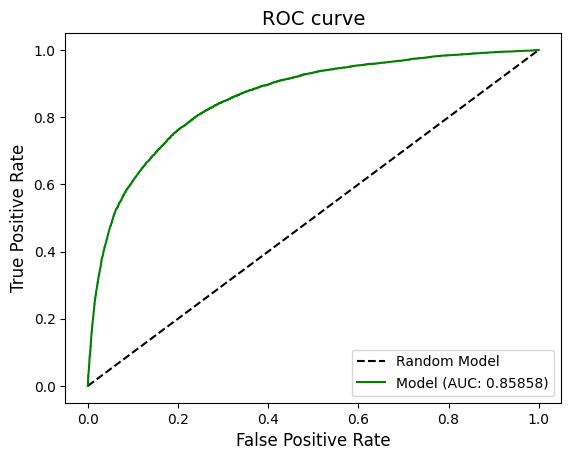

In [165]:
g1 = plot_auc_roc(y_train, pd.Series(scorecard.predict_proba(X_train)[:, 1]))

In [152]:
from optbinning.scorecard import plot_auc_roc, plot_ks

In [183]:
from optbinning.scorecard import plots

In [186]:
plots

<module 'optbinning.scorecard.plots' from '/usr/local/lib/python3.10/site-packages/optbinning/scorecard/plots.py'>

In [217]:

def calc_plot_auc_roc_mod(y, y_pred, title=None, xlabel=None, ylabel=None,
                     **kwargs):
        """Plot Area Under the Receiver Operating Characteristic Curve (AUC ROC).

        """

        fpr, tpr, _ = roc_curve(y, y_pred)
        auc_roc = roc_auc_score(y, y_pred)

        # Define the plot settings
        if title is None:
            title = "ROC curve"
        if xlabel is None:
            xlabel = "False Positive Rate"
        if ylabel is None:
            ylabel = "True Positive Rate"

        plt.plot(fpr, fpr, linestyle="--", color="k", label="Random Model")
        plt.plot(fpr, tpr,  label="Model (AUC: {:.5f})".format(auc_roc))
        plt.title(title, fontdict={"fontsize": 14})
        plt.xlabel(xlabel, fontdict={"fontsize": 12})
        plt.ylabel(ylabel, fontdict={"fontsize": 12})
        plt.legend(loc='lower right')


        return plt.gcf()

In [ ]:
color="g",

In [218]:
def get_plot_roc_auc_train_test(scorecard, X_train, y_train, X_test, y_test):
    """ plot train test roc_auc plots
    """
    train_roc_auc = round(roc_auc_score(y_train, pd.Series(scorecard.predict_proba(X_train)[:, 1])),2)
    test_roc_auc = round(roc_auc_score(y_test, pd.Series(scorecard.predict_proba(X_test)[:, 1])),2)
    g1 = calc_plot_auc_roc_mod(y_train, pd.Series(scorecard.predict_proba(X_train)[:, 1]))
    g1 = calc_plot_auc_roc_mod(y_test, scorecard.predict_proba(X_test)[:, 1], title='ROC Train {} Test {}'.format(train_roc_auc, test_roc_auc))
    return g1

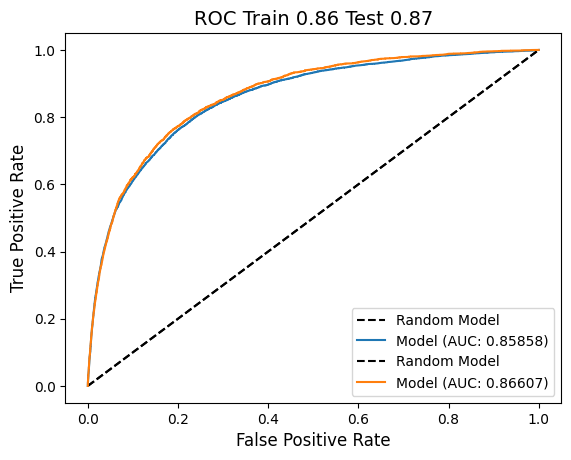

In [219]:
g1 = get_plot_roc_auc_train_test(scorecard, X_train, y_train, X_test, y_test)

In [252]:
from optbinning.scorecard import plot_auc_roc, plot_ks

In [ ]:
def get_plot_ks_train_test(scorecard, X_train, y_train, X_test, y_test ):
    plt.figure(figsize=(9, 3))
    plt.subplot(121)
    plot_ks(y_train, scorecard.predict_proba(X_train)[:, 1], title='KS Train')
    plt.subplot(122)
    plot_ks(y_test, scorecard.predict_proba(X_test)[:, 1], title='KS Test')
    #plt.suptitle('KS')
    c1 = plt.gcf()
    return c1

In [258]:
def get_plot_roc_auc_train_test2(scorecard, X_train, y_train, X_test, y_test):
    """ plot train test roc_auc plots
    """
    train_roc_auc = round(roc_auc_score(y_train, pd.Series(scorecard.predict_proba(X_train)[:, 1])),2)
    test_roc_auc = round(roc_auc_score(y_test, pd.Series(scorecard.predict_proba(X_test)[:, 1])),2)
    plt.figure(figsize=(6.4, 4.8))
    plot_auc_roc(y_train, pd.Series(scorecard.predict_proba(X_train)[:, 1]))
    plot_auc_roc(y_test, scorecard.predict_proba(X_test)[:, 1], title='ROC Train {} Test {}'.format(train_roc_auc, test_roc_auc))
    c1 = plt.gcf()
    return c1




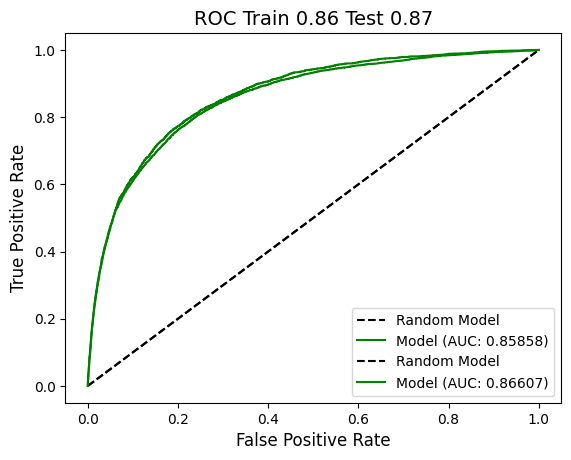

In [259]:
c2 =get_plot_roc_auc_train_test2(scorecard, X_train, y_train, X_test, y_test)

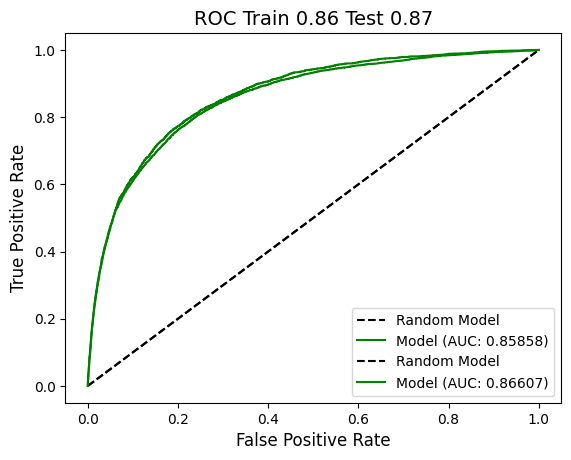

In [260]:
c2

In [265]:
mm.system_stability_report()

-----------------------------------
Monitoring: System Stability Report
-----------------------------------

  Population Stability Index (PSI)


    PSI total:      0.0003 (No significant change)

         PSI bin  Count  Count (%)
    [0.00, 0.10)     10        1.0
    [0.10, 0.25)      0        0.0
    [0.25, Inf+)      0        0.0

  Significance tests (H0: actual == expected)

     p-value bin  Count  Count (%)
    [0.00, 0.05)      0        0.0
    [0.05, 0.10)      1        0.1
    [0.10, 0.50)      4        0.4
    [0.50, 1.00)      5        0.5

  Target analysis

               Metric  Actual Actual (%)  Expected Expected (%)
    Number of records   49500          -    100500            -
        Event records    3296   0.066586      6730     0.066965
    Non-event records   46204   0.933414     93770     0.933035

  Performance metrics

                 Metric   Actual  Expected  Diff A - E
     True positive rate 0.211165  0.203863    0.007302
     True negative rate 0.987

In [214]:
scorecard

Scorecard(binning_process=BinningProcess(binning_fit_params={'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad...
                                         variable_names=['RevolvingUtilizationOfUnsecuredLines',
                                                         'age',
                                                         'NumberOfTime30-59DaysPastDueNotWorse',
                                                         'DebtRatio',
                                                         'MonthlyIncome',
                                                         'NumberOfOpenCreditLinesAndLoans',
                                                         'NumberOfTimes90DaysLate',
                                                         'NumberRealEstateLoansOrLines',
                                                         'NumberOfTime60-89DaysPastDueNotWorse',
                                                         'NumberOfDependents',
                                                         'Debt',
                                                         'NumberOfTime30+DaysPastDueNotWorse',
                                                         'feat_killer']),
          estimator=LogisticRegression(random_state=1234))

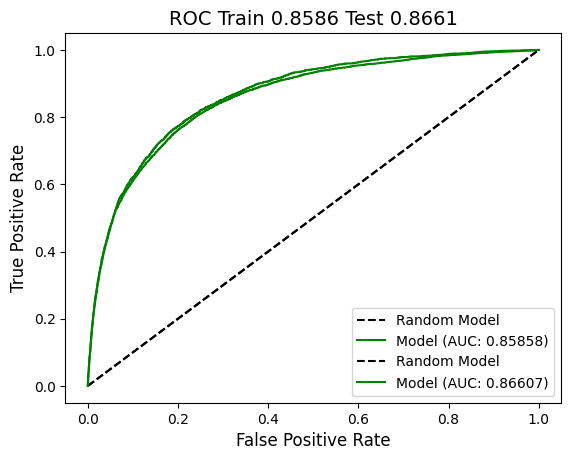

In [ ]:

plt.show()

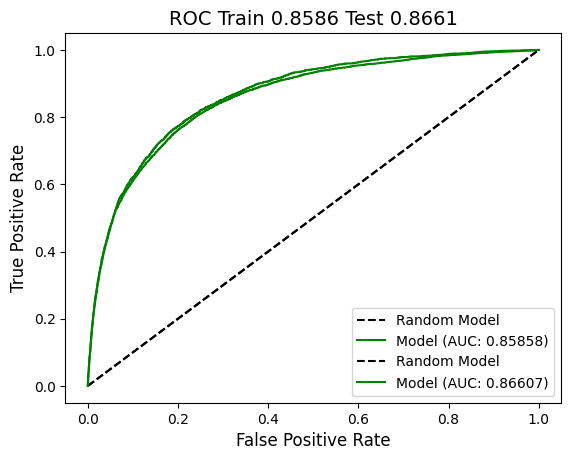

In [208]:
g1

In [175]:
plot_auc_roc

<function plot_auc_roc at 0xffff4f8bcc10>

In [247]:
def get_plot_auc_roc_train_test(scorecard, X_train, y_train, X_test, y_test ):
    plt.figure(figsize=(9, 3))
    plt.subplot(121)
    plot_ks(y_train, scorecard.predict_proba(X_train)[:, 1], title='KS Train')
    plt.subplot(122)
    plot_ks(y_test, scorecard.predict_proba(X_test)[:, 1], title='KS Test')
    #plt.suptitle('KS')
    c1 = plt.gcf()
    return c1

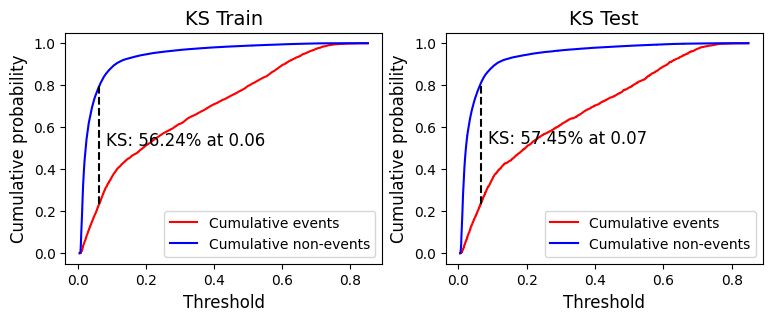

In [248]:
c1 = get_plot_auc_roc_train_test(scorecard, X_train, y_train, X_test, y_test )

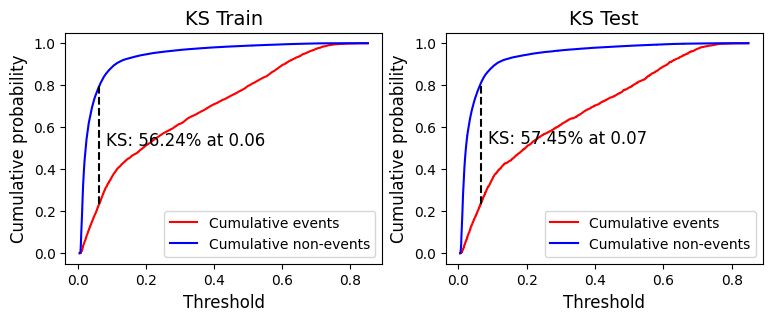

In [250]:
c1

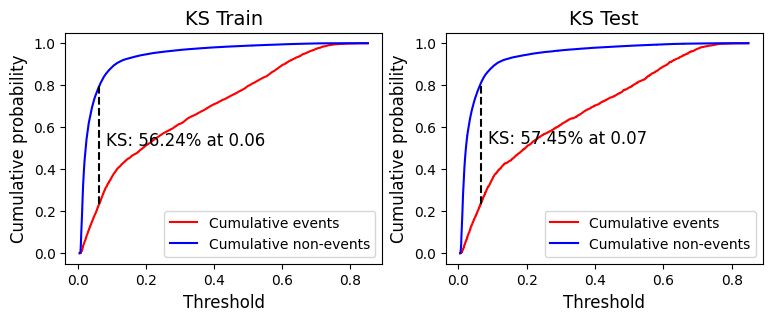

In [251]:

plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ks(y_train, scorecard.predict_proba(X_train)[:, 1], title='KS Train')
plt.subplot(122)
plot_ks(y_test, scorecard.predict_proba(X_test)[:, 1], title='KS Test')
#plt.suptitle('KS')
c1 = plt.gcf()
plt.show()

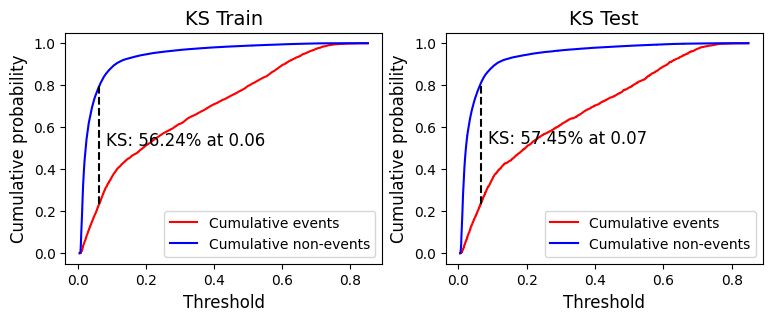

In [245]:
c1

In [284]:
reg_coef = pd.DataFrame((zip(mm.scorecard.estimator_.feature_names_in_, mm.scorecard.estimator_.coef_[0])), columns=['name', 'reg_coef'])
reg_coef

,name,reg_coef
0,RevolvingUtilizationOfUnsecuredLines,-0.579769
1,age,-0.384442
2,NumberOfTime30-59DaysPastDueNotWorse,-0.054306
3,DebtRatio,-0.652369
4,MonthlyIncome,-0.362965
5,NumberOfOpenCreditLinesAndLoans,-0.028997
6,NumberOfTimes90DaysLate,-0.311119
7,NumberRealEstateLoansOrLines,-0.510643
8,NumberOfTime60-89DaysPastDueNotWorse,-0.215113
9,NumberOfDependents,-0.139337


In [285]:
import plotly.graph_objects as go 

In [307]:
def get_plot_coefs_scorecard_model (scorecard_monitoring):
    """
    get plot of coefs scorecard
    """
    reg_coef = pd.DataFrame((zip(scorecard_monitoring.scorecard.estimator_.feature_names_in_, scorecard_monitoring.scorecard.estimator_.coef_[0])), columns=['name', 'reg_coef'])

    colors = ['darkred',] * reg_coef.shape[0]
    for i in list(reg_coef[reg_coef.reg_coef<0].index):
        colors[i] = 'darkgreen' 
    fig_gini_vars = go.Figure(go.Bar(
                x=reg_coef.reg_coef,
                y=reg_coef.name,
                orientation='h',
                marker_color = colors,
                text = round(reg_coef.reg_coef,2),
                textposition='auto'
                 ),
                #layout_xaxis_range=[-1.5,1.5],
                layout={'title':"Gini total - matured FPD15 variables Open Gate"}
                )
    fig_gini_vars.update_layout( title_x=0.5,
                                 height=480,
                                 width = 640  )
    return fig_gini_vars

In [308]:
fig_gini_vars2 = get_plot_coefs_scorecard_model(mm)

In [309]:
fig_gini_vars2

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
def get_plot_coefs_scorecard_model (scorecard_monitoring):
    """
    get plot of coefs scorecard
    """
    plt.figure(figsize=(5, 5))
    reg_coef = pd.DataFrame((zip(scorecard_monitoring.scorecard.estimator_.feature_names_in_, scorecard_monitoring.scorecard.estimator_.coef_[0])), columns=['name', 'reg_coef'])
    g1 = sns.barplot(round(reg_coef,2), x="reg_coef", y="name", errorbar=None)
    g1.bar_label(g1.containers[0], fontsize=8)


    return g1.get_figure()

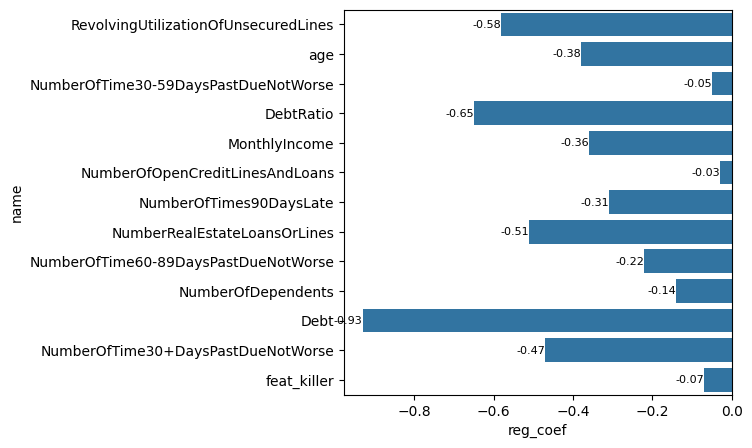

In [24]:
g2 = get_plot_coefs_scorecard_model(mm)

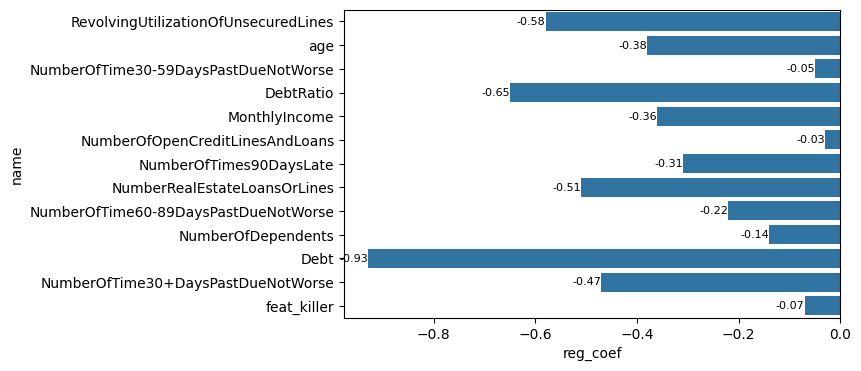

In [20]:
g2

In [ ]:
  Gini_vars_frames = list()
    for x in features + [x for x in df_sim_all.columns if '_score_parsed' in x and 'calib' not in x]:
        if 'woe' in x:
            try:
                gini_one_df =  pd.DataFrame({'variable':[x], 
                                            'Gini': (-1)*(2*roc_auc_score(df_sim_all[(df_sim_all.flag_matured_15 == 1) & (df_sim_all.flag_opengate ==1 ) & (~df_sim_all[x].isna())].fpd15, 
                                                                    df_sim_all[(df_sim_all.flag_matured_15 == 1) & (df_sim_all.flag_opengate ==1 ) & (~df_sim_all[x].isna())][[x]])-1)})
            except:
                gini_one_df =  pd.DataFrame({'variable':[x], 
                                    'Gini': None})
        else :
            try:
                gini_one_df =  pd.DataFrame({'variable':[x], 
                                            'Gini': (2*roc_auc_score(df_sim_all[(df_sim_all.flag_matured_15 == 1) & (df_sim_all.flag_opengate ==1 ) & (~df_sim_all[x].isna())].fpd15, 
                                                                    df_sim_all[(df_sim_all.flag_matured_15 == 1) & (df_sim_all.flag_opengate ==1 ) & (~df_sim_all[x].isna())][[x]])-1)})
            except:
                gini_one_df =  pd.DataFrame({'variable':[x], 
                                    'Gini': None})
    
    
        Gini_vars_frames.append(gini_one_df)
    Gini_variables = pd.concat(Gini_vars_frames, ignore_index=True)


    colors = ['darkgreen',] * Gini_variables.shape[0]
    for i in list(Gini_variables[Gini_variables.Gini<0].index):
        colors[i] = 'darkred'

    fig_gini_vars = go.Figure(go.Bar(
                x=Gini_variables.Gini,
                y=Gini_variables.variable,
                orientation='h',
                marker_color = colors,
                 ),

                layout_xaxis_range=[-0.2,0.345],
                layout={'title':"Gini total - matured FPD15 variables Open Gate"}


                )
    fig_gini_vars.update_layout( title_x=0.5,
                                 height=800  )


array([[-0.57976938, -0.38444183, -0.05430571, -0.652369  , -0.36296514,
        -0.02899693, -0.31111878, -0.51064299, -0.21511281, -0.13933663,
        -0.93261067, -0.47454779, -0.07191289]])

In [277]:
mm.scorecard.estimator_.intercept_

array([-2.63404366])

In [225]:
def calc_plot_ks_mod(y, y_pred, title=None, xlabel=None, ylabel=None,
            **kwargs):
    """Plot Kolmogorov-Smirnov (KS).

    """


    n_samples = y.shape[0]
    n_event = np.sum(y)
    n_nonevent = n_samples - n_event

    idx = y_pred.argsort()
    yy = y[idx]
    pp = y_pred[idx]

    cum_event = np.cumsum(yy)
    cum_population = np.arange(0, n_samples)
    cum_nonevent = cum_population - cum_event

    p_event = cum_event / n_event
    p_nonevent = cum_nonevent / n_nonevent

    p_diff = p_nonevent - p_event
    ks_score = np.max(p_diff)
    ks_max_idx = np.argmax(p_diff)

    # Define the plot settings
    if title is None:
        title = "Kolmogorov-Smirnov"
    if xlabel is None:
        xlabel = "Threshold"
    if ylabel is None:
        ylabel = "Cumulative probability"

    plt.title(title, fontdict={'fontsize': 14})
    plt.xlabel(xlabel, fontdict={'fontsize': 12})
    plt.ylabel(ylabel, fontdict={'fontsize': 12})

    plt.plot(pp, p_event, color="r", label="Cumulative events")
    plt.plot(pp, p_nonevent, color="b", label="Cumulative non-events")

    plt.vlines(pp[ks_max_idx], ymin=p_event[ks_max_idx],
               ymax=p_nonevent[ks_max_idx], color="k", linestyles="--")

    # Set KS value inside plot
    pos_x = pp[ks_max_idx] + 0.02
    pos_y = 0.5 * (p_nonevent[ks_max_idx] + p_event[ks_max_idx])
    text = "KS: {:.2%} at {:.2f}".format(ks_score, pp[ks_max_idx])
    plt.text(pos_x, pos_y, text, fontsize=12, rotation_mode="anchor")

    plt.legend(loc='lower right')

    return plt.gcf()

In [231]:

def plot_ks(y, y_pred, title=None, xlabel=None, ylabel=None,
            savefig=False, fname=None, **kwargs):
    """Plot Kolmogorov-Smirnov (KS).

    Parameters
    ----------
    y : array-like, shape = (n_samples,)
        Array with the target labels.

    y_pred : array-like, shape = (n_samples,)
        Array with predicted probabilities.

    title : str or None, optional (default=None)
        Title for the plot.

    xlabel : str or None, optional (default=None)
        Label for the x-axis.

    ylabel : str or None, optional (default=None)
        Label for the y-axis.

    savefig : bool (default=False)
        Whether to save the figure.

    fname : str or None, optional (default=None)
        Name for the figure file.

    **kwargs : keyword arguments
        Keyword arguments for matplotlib.pyplot.savefig().
    """
    #y, y_pred = _check_arrays(y, y_pred)
#
    #_check_parameters(title, xlabel, ylabel, savefig, fname)

    n_samples = y.shape[0]
    n_event = np.sum(y)
    n_nonevent = n_samples - n_event

    idx = y_pred.argsort()
    yy = y[idx]
    pp = y_pred[idx]

    cum_event = np.cumsum(yy)
    cum_population = np.arange(0, n_samples)
    cum_nonevent = cum_population - cum_event

    p_event = cum_event / n_event
    p_nonevent = cum_nonevent / n_nonevent

    p_diff = p_nonevent - p_event
    ks_score = np.max(p_diff)
    ks_max_idx = np.argmax(p_diff)

    # Define the plot settings
    if title is None:
        title = "Kolmogorov-Smirnov"
    if xlabel is None:
        xlabel = "Threshold"
    if ylabel is None:
        ylabel = "Cumulative probability"

    plt.title(title, fontdict={'fontsize': 14})
    plt.xlabel(xlabel, fontdict={'fontsize': 12})
    plt.ylabel(ylabel, fontdict={'fontsize': 12})

    plt.plot(pp, p_event, color="r", label="Cumulative events")
    plt.plot(pp, p_nonevent, color="b", label="Cumulative non-events")

    plt.vlines(pp[ks_max_idx], ymin=p_event[ks_max_idx],
               ymax=p_nonevent[ks_max_idx], color="k", linestyles="--")

    # Set KS value inside plot
    pos_x = pp[ks_max_idx] + 0.02
    pos_y = 0.5 * (p_nonevent[ks_max_idx] + p_event[ks_max_idx])
    text = "KS: {:.2%} at {:.2f}".format(ks_score, pp[ks_max_idx])
    plt.text(pos_x, pos_y, text, fontsize=12, rotation_mode="anchor")

    plt.legend(loc='lower right')

    # Save figure if requested. Pass kwargs.
    if savefig:
        plt.savefig(fname=fname, **kwargs)
        plt.close()

In [226]:
def get_plot_ks(scorecard, X_train, y_train, X_test, y_test):
    g1 = plt.figure(figsize=(9, 3))
    g1 = plt.subplot(121)
    g1 = calc_plot_ks_mod(y_train, scorecard.predict_proba(X_train)[:, 1], title='KS Train')
    g1 = plt.subplot(122)
    g1 = calc_plot_ks_mod(y_test, scorecard.predict_proba(X_test)[:, 1], title='KS Test')
    return g1



In [ ]:
g1 = get_plot_ks(scorecard, X_train, y_train, X_test, y_test)

In [238]:
from optbinning.scorecard import plot_auc_roc, plot_ks

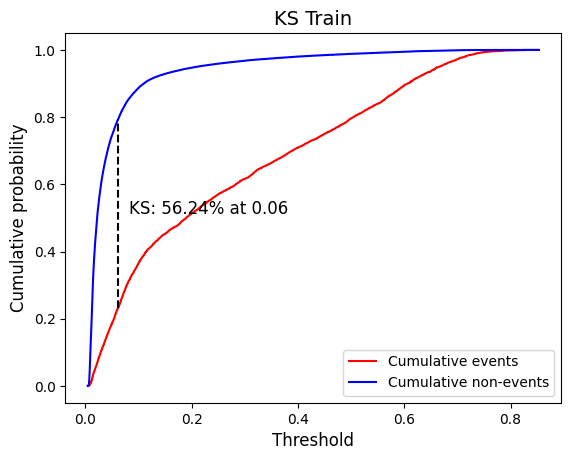

In [239]:
plot_ks(y_train, scorecard.predict_proba(X_train)[:, 1], title='KS Train')

In [240]:
from optbinning.scorecard import plot_auc_roc, plot_ks

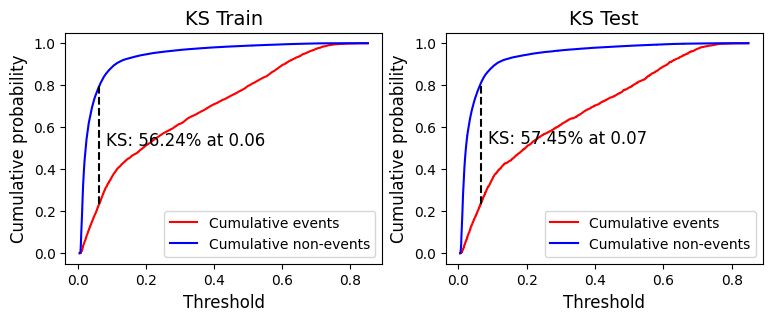

In [241]:

plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ks(y_train, scorecard.predict_proba(X_train)[:, 1], title='KS Train')
plt.subplot(122)
plot_ks(y_test, scorecard.predict_proba(X_test)[:, 1], title='KS Test')
#plt.suptitle('KS')
plt.show()

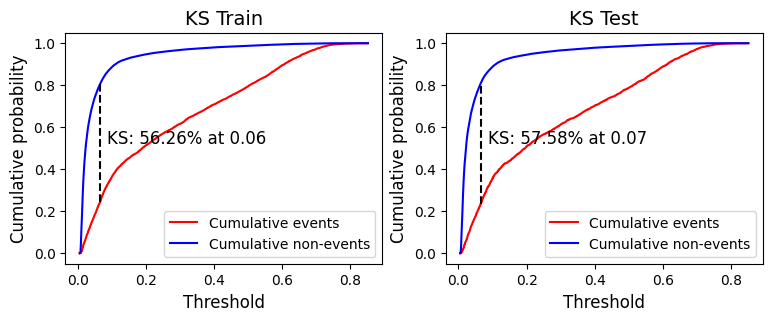

In [628]:

plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_ks(y_train, scorecard.predict_proba(X_train)[:, 1], title='KS Train')
plt.subplot(122)
plot_ks(y_test, scorecard.predict_proba(X_test)[:, 1], title='KS Test')
#plt.suptitle('KS')
plt.show()

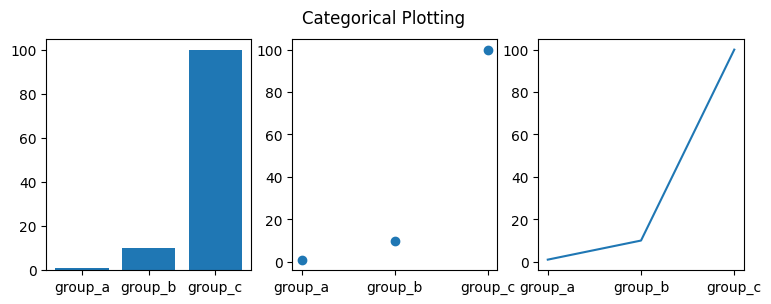

In [624]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [168]:

monitoring = ScorecardMonitoring(scorecard=scorecard, psi_method="cart",
                                 psi_n_bins=10, verbose=True)

In [169]:
monitoring.fit(X_test, y_test, X_train, y_train)

2025-01-26 16:35:53,337 | INFO : Monitoring started.
2025-01-26 16:35:53,341 | INFO : Options: check parameters.
2025-01-26 16:35:53,350 | INFO : System stability analysis started.
2025-01-26 16:35:53,764 | INFO : System stability analysis terminated. Time: 0.4139s
2025-01-26 16:35:53,765 | INFO : Variable analysis started.
2025-01-26 16:35:53,878 | INFO : Variable analysis terminated. Time: 0.1123s
2025-01-26 16:35:53,878 | INFO : Monitoring terminated. Time: 0.5415s


ScorecardMonitoring(psi_n_bins=10,
                    scorecard=Scorecard(binning_process=BinningProcess(binning_fit_params={'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'fl...
                                                                       variable_names=['RevolvingUtilizationOfUnsecuredLines',
                                                                                       'age',
                                                                                       'NumberOfTime30-59DaysPastDueNotWorse',
                                                                                       'DebtRatio',
                                                                                       'MonthlyIncome',
                                                                                       'NumberOfOpenCreditLinesAndLoans',
                                                                                       'NumberOfTimes90DaysLate',
                                                                                       'NumberRealEstateLoansOrLines',
                                                                                       'NumberOfTime60-89DaysPastDueNotWorse',
                                                                                       'NumberOfDependents',
                                                                                       'Debt',
                                                                                       'NumberOfTime30+DaysPastDueNotWorse',
                                                                                       'feat_killer']),
                                        estimator=LogisticRegression(random_state=1234)),
                    verbose=True)

In [170]:

monitoring.information(print_level=2)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    scorecard                            yes   * U
    psi_method                          cart   * d
    psi_n_bins                            10   * U
    psi_min_bin_size                    0.05   * d
    show_digits                            2   * d
    verbose                             True   * U
  End options

  Statistics
    Number of records Actual           49500
    Number of records Expected        100500
    Number of scorecard variables         13
    Target type                       binary

  Timing
    Total time                          0.54 sec
    System stability                    0.41 sec   ( 76.43%)
    Variables stability                 0.11 sec   ( 20.73%)



In [171]:
monitoring.psi_table()

,Bin,Count A,Count E,Count A (%),Count E (%),PSI
0,"(-inf, -1.75)",10027,20471,0.202566,0.203692,6.240490e-06
1,"[-1.75, -1.39)",8813,17792,0.178040,0.177035,5.695639e-06
2,"[-1.39, -1.20)",3740,7542,0.075556,0.075045,3.464755e-06
3,"[-1.20, -0.94)",4173,8698,0.084303,0.086547,5.896242e-05
4,"[-0.94, -0.59)",4831,9891,0.097596,0.098418,6.893463e-06
5,"[-0.59, -0.25)",3926,7892,0.079313,0.078527,7.823552e-06
6,"[-0.25, -0.02)",2665,5213,0.053838,0.051871,7.326595e-05
7,"[-0.02, 0.42)",3886,7917,0.078505,0.078776,9.343575e-07
8,"[0.42, 1.16)",3038,6366,0.061374,0.063343,6.221179e-05
9,"[1.16, inf)",4401,8718,0.088909,0.086746,5.326381e-05


In [172]:
monitoring.tests_table()

,Bin,Count A,Count E,Event rate A,Event rate E,statistic,p-value
0,"(-inf, -1.75)",10027,20471,0.004687,0.005667,1.213948,0.270552
1,"[-1.75, -1.39)",8813,17792,0.008851,0.011016,2.711818,0.099607
2,"[-1.39, -1.20)",3740,7542,0.014706,0.014187,0.047522,0.827432
3,"[-1.20, -0.94)",4173,8698,0.022046,0.022419,0.017945,0.893436
4,"[-0.94, -0.59)",4831,9891,0.033740,0.032454,0.169002,0.681001
5,"[-0.59, -0.25)",3926,7892,0.045593,0.047516,0.216987,0.641345
6,"[-0.25, -0.02)",2665,5213,0.060788,0.068291,1.616003,0.203650
7,"[-0.02, 0.42)",3886,7917,0.098302,0.096375,0.110460,0.739621
8,"[0.42, 1.16)",3038,6366,0.148782,0.142004,0.765567,0.381592
9,"[1.16, inf)",4401,8718,0.383095,0.389654,0.530106,0.466562


In [ ]:
class A(object):
    def __init__(self, foo, bar):
        pass     
    def func1(self):
        op1()
        op2()
    def func2(self):
        pass

In [ ]:
class B(A):
    def func1(self):
        super(B, self).func1()
        op3()
        

In [237]:
class psi_plot_with_figure(ScorecardMonitoring):
        def func1(self):
            super(psi_plot_with_figure, self).psi_plot()
            fig2 = self.fig
            return fig2
  


In [ ]:
class psi_plot_with_figure(ScorecardMonitoring):
        def __init__(self):
            super().__init__()
        def psi_plot()     
            fig2 = self.fig
            return fig2

In [13]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [9]:
class ScorecardMonitoringMod(ScorecardMonitoring):
    def psi_plot(self, savefig=None):
        """Plot Population Stability Index (PSI).

        Parameters
        ----------
        savefig : str or None (default=None)
            Path to save the plot figure.
        """
        self._check_is_fitted()

        fig, ax1 = plt.subplots()

        n_bins = len(self._n_records_a)
        indices = np.arange(n_bins)
        width = np.min(np.diff(indices))/3

        p_records_a = self._n_records_a / self._n_records_a.sum() * 100.0
        p_records_e = self._n_records_e / self._n_records_e.sum() * 100.0

        p1 = ax1.bar(indices-width, p_records_a, width, color='tab:red',
                     label="Records Actual", alpha=0.75)
        p2 = ax1.bar(indices, p_records_e, width, color='tab:blue',
                     label="Records Expected", alpha=0.75)

        handles = [p1[0], p2[0]]
        labels = ['Actual', 'Expected']

        ax1.set_xlabel("Bin ID", fontsize=12)
        ax1.set_ylabel("Population distribution", fontsize=13)
        ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

        ax2 = ax1.twinx()

        if self._target_dtype == "binary":
            metric_label = "Event rate"
        elif self._target_dtype == "continuous":
            metric_label = "Mean"

        ax2.plot(indices, self._metric_a, linestyle="solid", marker="o",
                 color='tab:red')
        ax2.plot(indices, self._metric_e,  linestyle="solid", marker="o",
                 color='tab:blue')

        ax2.set_ylabel(metric_label, fontsize=13)
        ax2.xaxis.set_major_locator(mtick.MultipleLocator(1))

        ax2.set_xlim(-width * 2, n_bins - width * 2)

        plt.legend(handles, labels, loc="upper center",
                   bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=12)

        plt.tight_layout()

        if savefig is None:
            plt.show()
        else:
            if not isinstance(savefig, str):
                raise TypeError("savefig must be a string path; got {}."
                                .format(savefig))
            plt.savefig(savefig)
            plt.close()
        return fig

In [10]:

monitoring2 = ScorecardMonitoring2(scorecard=scorecard, psi_method="cart",
                                 psi_n_bins=10, verbose=True)

In [11]:
monitoring2.fit(X_test, y_test, X_train, y_train)

2025-02-01 08:55:05,655 | INFO : Monitoring started.
2025-02-01 08:55:05,660 | INFO : Options: check parameters.
2025-02-01 08:55:05,669 | INFO : System stability analysis started.
2025-02-01 08:55:06,138 | INFO : System stability analysis terminated. Time: 0.4690s
2025-02-01 08:55:06,139 | INFO : Variable analysis started.
2025-02-01 08:55:06,249 | INFO : Variable analysis terminated. Time: 0.1098s
2025-02-01 08:55:06,249 | INFO : Monitoring terminated. Time: 0.5943s


ScorecardMonitoring2(psi_n_bins=10,
                     scorecard=Scorecard(binning_process=BinningProcess(binning_fit_params={'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'f...
                                                                        variable_names=['RevolvingUtilizationOfUnsecuredLines',
                                                                                        'age',
                                                                                        'NumberOfTime30-59DaysPastDueNotWorse',
                                                                                        'DebtRatio',
                                                                                        'MonthlyIncome',
                                                                                        'NumberOfOpenCreditLinesAndLoans',
                                                                                        'NumberOfTimes90DaysLate',
                                                                                        'NumberRealEstateLoansOrLines',
                                                                                        'NumberOfTime60-89DaysPastDueNotWorse',
                                                                                        'NumberOfDependents',
                                                                                        'Debt',
                                                                                        'NumberOfTime30+DaysPastDueNotWorse',
                                                                                        'feat_killer']),
                                         estimator=LogisticRegression(random_state=1234)),
                     verbose=True)

In [23]:
df_validation = pd.read_pickle('/docker_disk/risk-model/data/07_model_output/df_validation_scored.pkl')

In [25]:
df_validation = pd.read_pickle('/docker_disk/risk-model/data/04_feature/df_validation.pkl')

In [40]:
df_development = pd.read_pickle('/docker_disk/risk-model/data/04_feature/df_dev.pkl')
df_development

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,flag_bad_utilization,flag_bad_dlq,flag_bad_noopencreds,feat_killer
Id,,,,,,,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,7323.197016,2,563.322847,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,316.878123,0,79.219531,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,258.914887,2,129.457443,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,118.963951,0,23.792790,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1584.975094,1,226.425013,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,472.774869,0,118.193717,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,4001.283436,0,1000.320859,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,3870.000000,0,215.000000,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...


In [42]:
monitoring2.fit(df_validation, df_validation['SeriousDlqin2yrs'].fillna(0), 
                df_development, df_development['SeriousDlqin2yrs'])

2025-02-01 09:38:47,454 | INFO : Monitoring started.
2025-02-01 09:38:47,455 | INFO : Options: check parameters.
2025-02-01 09:38:47,461 | INFO : System stability analysis started.


/usr/local/lib/python3.10/site-packages/optbinning/metrics/classification.py:89: RuntimeWarning: invalid value encountered in scalar divide
  tpr = tp / (tp + fn)


2025-02-01 09:38:48,295 | INFO : System stability analysis terminated. Time: 0.8341s
2025-02-01 09:38:48,297 | INFO : Variable analysis started.


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


2025-02-01 09:38:48,457 | INFO : Variable analysis terminated. Time: 0.1603s
2025-02-01 09:38:48,458 | INFO : Monitoring terminated. Time: 1.0038s


ScorecardMonitoring2(psi_n_bins=10,
                     scorecard=Scorecard(binning_process=BinningProcess(binning_fit_params={'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'f...
                                                                        variable_names=['RevolvingUtilizationOfUnsecuredLines',
                                                                                        'age',
                                                                                        'NumberOfTime30-59DaysPastDueNotWorse',
                                                                                        'DebtRatio',
                                                                                        'MonthlyIncome',
                                                                                        'NumberOfOpenCreditLinesAndLoans',
                                                                                        'NumberOfTimes90DaysLate',
                                                                                        'NumberRealEstateLoansOrLines',
                                                                                        'NumberOfTime60-89DaysPastDueNotWorse',
                                                                                        'NumberOfDependents',
                                                                                        'Debt',
                                                                                        'NumberOfTime30+DaysPastDueNotWorse',
                                                                                        'feat_killer']),
                                         estimator=LogisticRegression(random_state=1234)),
                     verbose=True)

In [46]:
monitoring2.psi_variable_table(style="detailed")

,Variable,Bin,Count A,Count E,Count A (%),Count E (%),PSI
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.06)",35582,52642,0.350551,0.350947,4.458512e-07
1,RevolvingUtilizationOfUnsecuredLines,"[0.06, 0.13)",12773,18468,0.125839,0.123120,5.937794e-05
2,RevolvingUtilizationOfUnsecuredLines,"[0.13, 0.22)",8499,12844,0.083732,0.085627,4.241600e-05
3,RevolvingUtilizationOfUnsecuredLines,"[0.22, 0.30)",6127,9027,0.060363,0.060180,5.541075e-07
4,RevolvingUtilizationOfUnsecuredLines,"[0.30, 0.39)",5091,7788,0.050156,0.051920,6.096362e-05
...,...,...,...,...,...,...,...
2,NumberOfTime30+DaysPastDueNotWorse,"[1.50, inf)",8993,13120,0.088598,0.087467,1.454874e-05
0,feat_killer,[flag_bad_utilization=0&flag_bad_dlq=0&flag_ba...,90432,133724,0.890929,0.891493,3.569270e-07
1,feat_killer,[flag_bad_utilization=0&flag_bad_dlq=0&flag_ba...,2078,3156,0.020472,0.021040,1.552802e-05
2,feat_killer,[flag_bad_utilization=0&flag_bad_dlq=1&flag_ba...,7647,11075,0.075338,0.073833,3.034262e-05


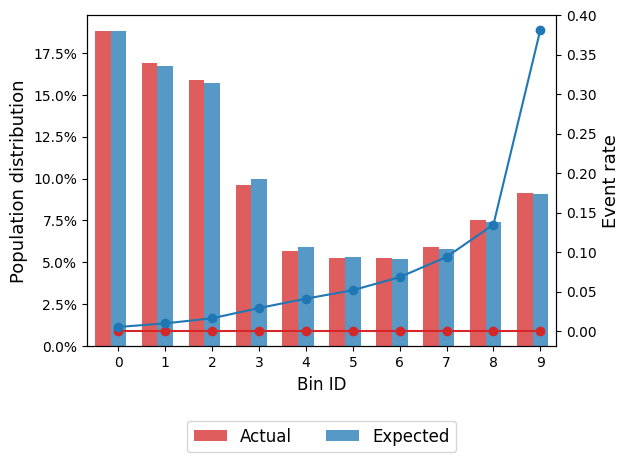

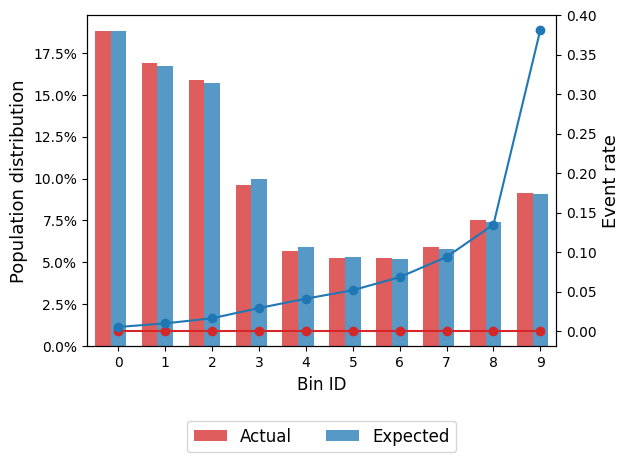

In [126]:
monitoring2.psi_plot()

In [44]:
monitoring2.psi_variable_table()

,Variable,PSI
0,Debt,4.091258e-05
1,DebtRatio,1.222445e-04
2,MonthlyIncome,1.687314e-04
3,NumberOfDependents,1.422527e-04
4,NumberOfOpenCreditLinesAndLoans,6.756173e-05
5,NumberOfTime30+DaysPastDueNotWorse,2.187926e-05
6,NumberOfTime30-59DaysPastDueNotWorse,1.805290e-05
7,NumberOfTime60-89DaysPastDueNotWorse,6.204725e-07
8,NumberOfTimes90DaysLate,1.055273e-05
9,NumberRealEstateLoansOrLines,9.280366e-05


In [45]:
monitoring2.psi_variable_table()

,Variable,PSI
0,Debt,4.091258e-05
1,DebtRatio,1.222445e-04
2,MonthlyIncome,1.687314e-04
3,NumberOfDependents,1.422527e-04
4,NumberOfOpenCreditLinesAndLoans,6.756173e-05
5,NumberOfTime30+DaysPastDueNotWorse,2.187926e-05
6,NumberOfTime30-59DaysPastDueNotWorse,1.805290e-05
7,NumberOfTime60-89DaysPastDueNotWorse,6.204725e-07
8,NumberOfTimes90DaysLate,1.055273e-05
9,NumberRealEstateLoansOrLines,9.280366e-05


In [79]:


class ScorecardMonitoringMod(ScorecardMonitoring):
    def psi_plot(self, savefig=None):
        """Plot Population Stability Index (PSI).

        Parameters
        ----------
        return plot
        """
        self._check_is_fitted()

        fig, ax1 = plt.subplots()

        n_bins = len(self._n_records_a)
        indices = np.arange(n_bins)
        width = np.min(np.diff(indices))/3

        p_records_a = self._n_records_a / self._n_records_a.sum() * 100.0
        p_records_e = self._n_records_e / self._n_records_e.sum() * 100.0

        p1 = ax1.bar(indices-width, p_records_a, width, color='tab:red',
                     label="Records Actual", alpha=0.75)
        p2 = ax1.bar(indices, p_records_e, width, color='tab:blue',
                     label="Records Expected", alpha=0.75)

        handles = [p1[0], p2[0]]
        labels = ['Actual', 'Expected']

        ax1.set_xlabel("Bin ID", fontsize=12)
        ax1.set_ylabel("Population distribution", fontsize=13)
        ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

        ax2 = ax1.twinx()

        if self._target_dtype == "binary":
            metric_label = "Event rate"
        elif self._target_dtype == "continuous":
            metric_label = "Mean"

        ax2.plot(indices, self._metric_a, linestyle="solid", marker="o",
                 color='tab:red')
        ax2.plot(indices, self._metric_e,  linestyle="solid", marker="o",
                 color='tab:blue')

        ax2.set_ylabel(metric_label, fontsize=13)
        ax2.xaxis.set_major_locator(mtick.MultipleLocator(1))

        ax2.set_xlim(-width * 2, n_bins - width * 2)

        plt.legend(handles, labels, loc="upper center",
                   bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=12)

        plt.tight_layout()

        if savefig is None:
            plt.show()
        else:
            if not isinstance(savefig, str):
                raise TypeError("savefig must be a string path; got {}."
                                .format(savefig))
            plt.savefig(savefig)
            plt.close()
        return fig

def get_statistics_monitoring(scorecard, psi_method:str, psi_n_bins:int, target:str,
                                X_actual, y_actual, X_expected, y_expected, inplace_y_actual):
    """
    file with scorecard metrics and statics (Gini, KS, PSI, etc.) 
    """
    scorecard_monitoring = ScorecardMonitoringMod(scorecard=scorecard, psi_method=psi_method,
                                 psi_n_bins = psi_n_bins, verbose=False)
    if  (type(y_actual) == str) and (target !=''): 
        y_actual = X_actual[target].fillna(inplace_y_actual)
    else:
        pass
    if  (type(y_expected) == str) and (target !=''): 
        y_expected = X_expected[target]
    else:
        pass    
    scorecard_monitoring.fit(X_actual, y_actual, X_expected, y_expected)                                 
    return scorecard_monitoring

In [80]:

scorecard_monitoring1 = get_statistics_monitoring(scorecard, psi_method = 'cart', psi_n_bins = 10, target = 'SeriousDlqin2yrs',
                                X_actual=X_test, y_actual=y_test, X_expected = X_train, y_expected = y_train, inplace_y_actual= None)

In [81]:

scorecard_monitoring2 = get_statistics_monitoring(scorecard, psi_method = 'cart', psi_n_bins = 10, target = 'SeriousDlqin2yrs',
                                X_actual=df_validation, y_actual='', X_expected = df_development, y_expected = '', inplace_y_actual = 0)

/usr/local/lib/python3.10/site-packages/optbinning/metrics/classification.py:89: RuntimeWarning: invalid value encountered in scalar divide
  tpr = tp / (tp + fn)
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [ ]:
dd = scorecard_monitoring2.psi_plot()

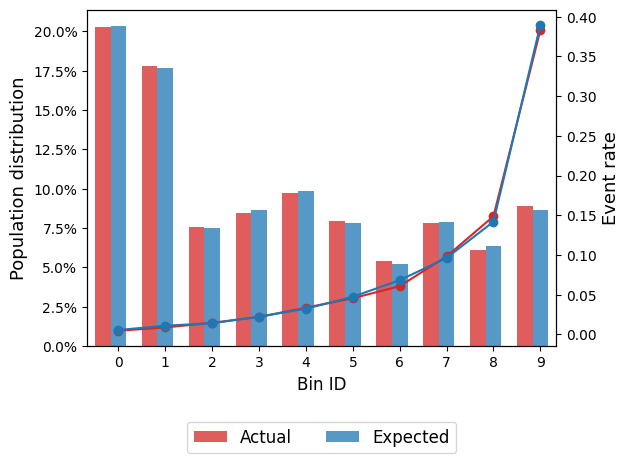

In [83]:
dd = scorecard_monitoring1.psi_plot()

In [88]:
tt = None

In [89]:
type(tt) == 'NoneType'

False

In [91]:
type(tt) ==type(None)

True

In [95]:
import pickle

In [105]:
with open('/docker_disk/risk-model/data/08_reporting/scorecard_monitoring_dev_valid.pkl', 'rb') as f:
    kk = pickle.load(f)

ModuleNotFoundError: No module named 'risk_model'

In [5]:
 %load_ext kedro.ipython

[02/02/25 13:57:44] INFO     Using                                                                  ]8;id=341280;file:///usr/local/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=17115;file:///usr/local/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/usr/local/lib/python3.10/site-packages/kedro/framework/project/rich_                
                             logging.yml' as logging configuration.                                                

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=526495;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=253160;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=848571;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=307769;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Resolved project path as: /docker_disk/risk-model.                     ]8;id=356364;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=840773;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/02/25 13:57:45] WARNING  /usr/local/lib/python3.10/importlib/__init__.py:126:                   ]8;id=987071;file:///usr/local/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=609516;file:///usr/local/lib/python3.10/warnings.py#109\109]8;;\
                             KedroDeprecationWarning: `tracking.JSONDataset` and                                   
                             `tracking.MetricsDataset` are deprecated. These datasets will be                      
                             removed in kedro-datasets 7.0.0                                                       
                               return _bootstrap._gcd_import(name[level:], package, level)                         
                                                                                                                   

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=713488;file:///usr/local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=521988;file:///usr/local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project risk_model                                               ]8;id=512268;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=864474;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=149727;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=629692;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

[02/02/25 13:57:46] INFO     Registered line magic 'run_viz'                                        ]8;id=267145;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=864139;file:///usr/local/lib/python3.10/site-packages/kedro/ipython/__init__.py#151\151]8;;\

In [ ]:
%reload_ext kedro.ipython

In [6]:
mm = catalog.load("08_reporting_statistics_monitoring_train_test")

                    INFO     Loading data from 08_reporting_statistics_monitoring_train_test    ]8;id=656349;file:///usr/local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=279942;file:///usr/local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (PickleDataset)...                                                                    

In [146]:
mm.psi_table()

,Bin,Count A,Count E,Count A (%),Count E (%),PSI
0,"(-inf, -1.75)",10027,20471,0.202566,0.203692,6.240490e-06
1,"[-1.75, -1.39)",8813,17792,0.178040,0.177035,5.695639e-06
2,"[-1.39, -1.20)",3740,7542,0.075556,0.075045,3.464755e-06
3,"[-1.20, -0.94)",4173,8698,0.084303,0.086547,5.896242e-05
4,"[-0.94, -0.59)",4831,9891,0.097596,0.098418,6.893463e-06
5,"[-0.59, -0.25)",3926,7892,0.079313,0.078527,7.823552e-06
6,"[-0.25, -0.02)",2665,5213,0.053838,0.051871,7.326595e-05
7,"[-0.02, 0.42)",3886,7917,0.078505,0.078776,9.343575e-07
8,"[0.42, 1.16)",3038,6366,0.061374,0.063343,6.221179e-05
9,"[1.16, inf)",4401,8718,0.088909,0.086746,5.326381e-05


In [137]:
mm.information(print_level=2)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    scorecard                            yes   * U
    psi_method                          cart   * d
    psi_n_bins                            10   * U
    psi_min_bin_size                    0.05   * d
    show_digits                            2   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records Actual           49500
    Number of records Expected        100500
    Number of scorecard variables         13
    Target type                       binary

  Timing
    Total time                          0.50 sec
    System stability                    0.39 sec   ( 78.28%)
    Variables stability                 0.11 sec   ( 21.47%)



In [139]:
mm.system_stability_report()

-----------------------------------
Monitoring: System Stability Report
-----------------------------------

  Population Stability Index (PSI)


    PSI total:      0.0003 (No significant change)

         PSI bin  Count  Count (%)
    [0.00, 0.10)     10        1.0
    [0.10, 0.25)      0        0.0
    [0.25, Inf+)      0        0.0

  Significance tests (H0: actual == expected)

     p-value bin  Count  Count (%)
    [0.00, 0.05)      0        0.0
    [0.05, 0.10)      1        0.1
    [0.10, 0.50)      4        0.4
    [0.50, 1.00)      5        0.5

  Target analysis

               Metric  Actual Actual (%)  Expected Expected (%)
    Number of records   49500          -    100500            -
        Event records    3296   0.066586      6730     0.066965
    Non-event records   46204   0.933414     93770     0.933035

  Performance metrics

                 Metric   Actual  Expected  Diff A - E
     True positive rate 0.211165  0.203863    0.007302
     True negative rate 0.987

In [141]:
actual == expected
mm.tests_table()

,Bin,Count A,Count E,Event rate A,Event rate E,statistic,p-value
0,"(-inf, -1.75)",10027,20471,0.004687,0.005667,1.213948,0.270552
1,"[-1.75, -1.39)",8813,17792,0.008851,0.011016,2.711818,0.099607
2,"[-1.39, -1.20)",3740,7542,0.014706,0.014187,0.047522,0.827432
3,"[-1.20, -0.94)",4173,8698,0.022046,0.022419,0.017945,0.893436
4,"[-0.94, -0.59)",4831,9891,0.033740,0.032454,0.169002,0.681001
5,"[-0.59, -0.25)",3926,7892,0.045593,0.047516,0.216987,0.641345
6,"[-0.25, -0.02)",2665,5213,0.060788,0.068291,1.616003,0.203650
7,"[-0.02, 0.42)",3886,7917,0.098302,0.096375,0.110460,0.739621
8,"[0.42, 1.16)",3038,6366,0.148782,0.142004,0.765567,0.381592
9,"[1.16, inf)",4401,8718,0.383095,0.389654,0.530106,0.466562


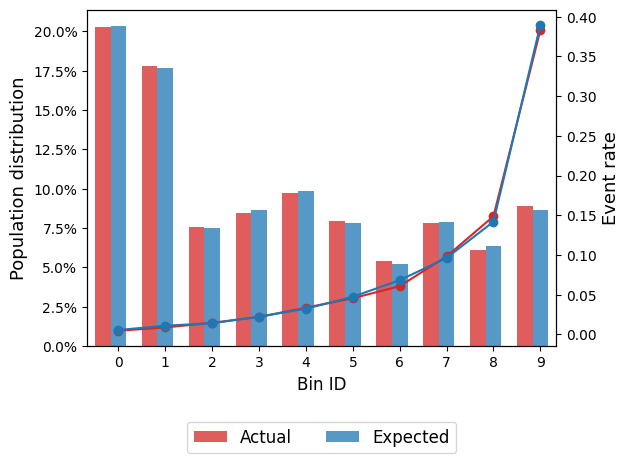

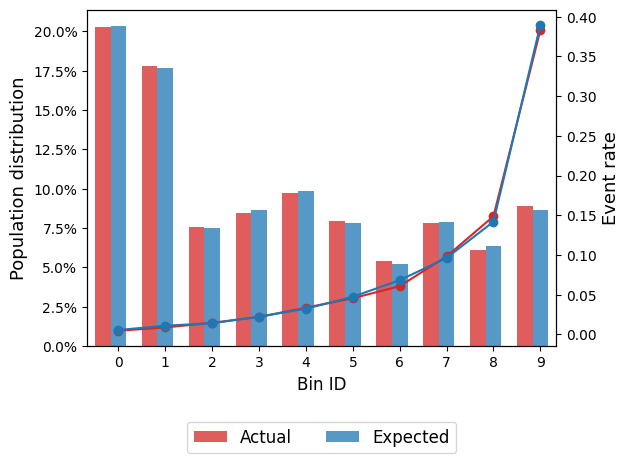

In [140]:
mm.psi_plot()

In [ ]:
optbinning.scorecard.plot_auc_roc

In [122]:
if type(y_test) == str:
    print('kek')

In [58]:
y_test.dtype

dtype('int64')

In [57]:
if  (y_test == ''): 
    print('kek')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

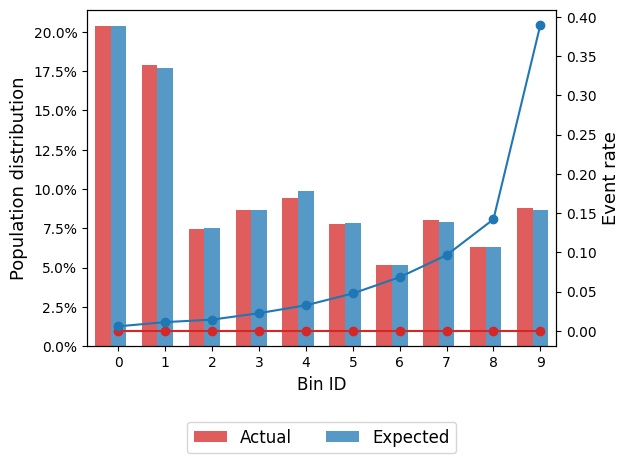

In [33]:
dd = monitoring2.psi_plot()

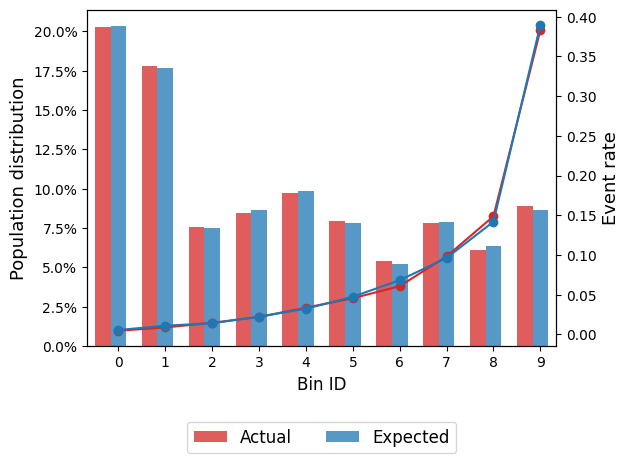

In [14]:
dd = monitoring2.psi_plot()

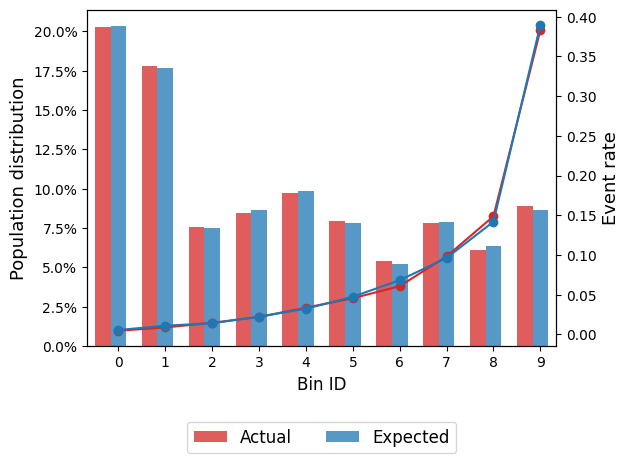

In [15]:
dd

In [178]:
def psi_plot_with_figure():
    kk = monitoring.psi_plot()
    return kk.plt

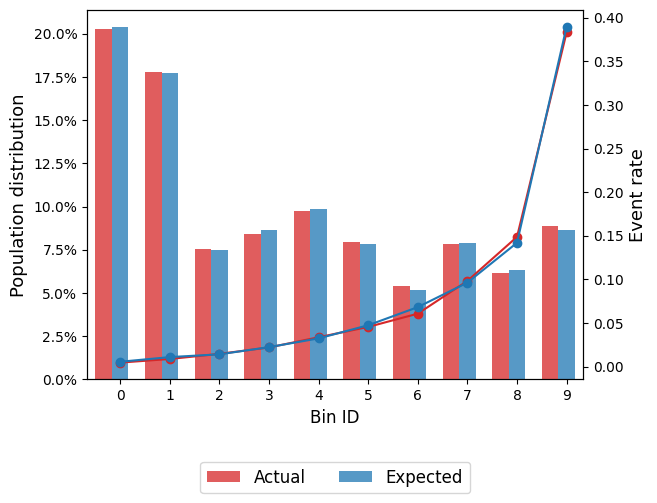

AttributeError: 'NoneType' object has no attribute 'plt'

In [179]:
psi_plot_with_figure()

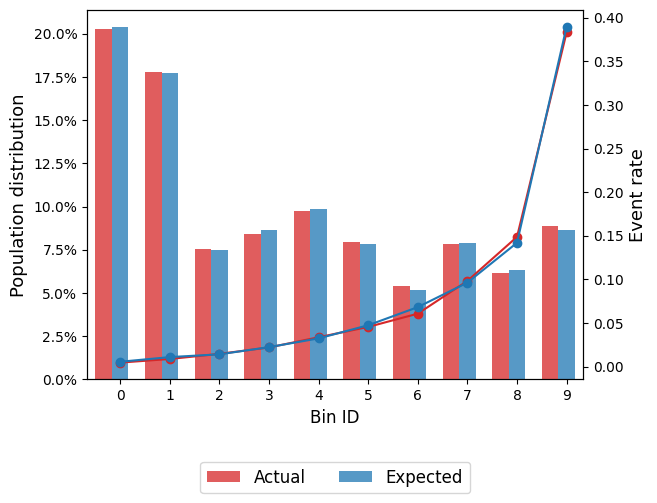

In [174]:
ccc = monitoring.psi_plot()

In [177]:
ccc.figure()

AttributeError: 'NoneType' object has no attribute 'figure'

In [573]:
monitoring.tests_table()

,Bin,Count A,Count E,Event rate A,Event rate E,statistic,p-value
0,"(-inf, -1.73)",10396,21248,0.004713,0.005742,1.373525,0.241207
1,"[-1.73, -1.38)",8610,17362,0.009292,0.011116,1.842540,0.174654
2,"[-1.38, -1.21)",3244,6509,0.014488,0.014288,0.006144,0.937524
3,"[-1.21, -0.93)",4701,9825,0.021059,0.021985,0.128345,0.720155
4,"[-0.93, -0.67)",3573,7217,0.032186,0.030761,0.160418,0.688772
5,"[-0.67, -0.26)",4917,10010,0.044539,0.045854,0.131464,0.716919
6,"[-0.26, -0.01)",2856,5548,0.061975,0.068313,1.225934,0.268199
7,"[-0.01, 0.40)",3622,7351,0.096356,0.095497,0.020644,0.885753
8,"[0.40, 1.15)",3158,6662,0.147245,0.140498,0.797293,0.371904
9,"[1.15, inf)",4423,8768,0.383450,0.388686,0.339777,0.559958


In [574]:
monitoring.system_stability_report()

-----------------------------------
Monitoring: System Stability Report
-----------------------------------

  Population Stability Index (PSI)


    PSI total:      0.0004 (No significant change)

         PSI bin  Count  Count (%)
    [0.00, 0.10)     10        1.0
    [0.10, 0.25)      0        0.0
    [0.25, Inf+)      0        0.0

  Significance tests (H0: actual == expected)

     p-value bin  Count  Count (%)
    [0.00, 0.05)      0        0.0
    [0.05, 0.10)      0        0.0
    [0.10, 0.50)      4        0.4
    [0.50, 1.00)      6        0.6

  Target analysis

               Metric  Actual Actual (%)  Expected Expected (%)
    Number of records   49500          -    100500            -
        Event records    3296   0.066586      6730     0.066965
    Non-event records   46204   0.933414     93770     0.933035

  Performance metrics

                 Metric   Actual  Expected  Diff A - E
     True positive rate 0.211468  0.205498    0.005971
     True negative rate 0.987

In [575]:
monitoring.psi_variable_table(style="detailed")

,Variable,Bin,Count A,Count E,Count A (%),Count E (%),PSI
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.06)",17330,35312,0.350101,0.351363,0.000005
1,RevolvingUtilizationOfUnsecuredLines,"[0.06, 0.13)",6009,12459,0.121394,0.123970,0.000054
2,RevolvingUtilizationOfUnsecuredLines,"[0.13, 0.22)",4212,8632,0.085091,0.085891,0.000007
3,RevolvingUtilizationOfUnsecuredLines,"[0.22, 0.30)",2989,6038,0.060384,0.060080,0.000002
4,RevolvingUtilizationOfUnsecuredLines,"[0.30, 0.39)",2611,5177,0.052747,0.051512,0.000029
...,...,...,...,...,...,...,...
7,avg_debt_per_credit,"[646.04, inf)",2474,5093,0.049980,0.050677,0.000010
0,feat_killer,[flag_bad_utilization=0&flag_bad_dlq=0&flag_ba...,44087,89637,0.890646,0.891910,0.000002
1,feat_killer,[flag_bad_utilization=0&flag_bad_dlq=0&flag_ba...,1089,2067,0.022000,0.020567,0.000096
2,feat_killer,[flag_bad_utilization=0&flag_bad_dlq=1&flag_ba...,3669,7406,0.074121,0.073692,0.000002


In [576]:
monitoring.psi_variable_table(style="summary")

,Variable,PSI
0,Debt,0.000122
1,DebtRatio,0.000146
2,MonthlyIncome,0.000221
3,NumberOfDependents,0.000029
4,NumberOfOpenCreditLinesAndLoans,0.000172
5,NumberOfTime30+DaysPastDueNotWorse,0.000004
6,NumberOfTime30-59DaysPastDueNotWorse,0.000018
7,NumberOfTime60-89DaysPastDueNotWorse,0.000014
8,NumberOfTimes90DaysLate,0.000026
9,NumberRealEstateLoansOrLines,0.000014


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

best combination (ACC: 0.861): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13)

all subsets:
 {1: {'feature_idx': (0,), 'cv_scores': array([0.77282019, 0.77260052, 0.78095691, 0.77796311]), 'avg_score': 0.7760851806656208, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines',)}, 2: {'feature_idx': (0, 11), 'cv_scores': array([0.84134613, 0.84303463, 0.85174721, 0.8476562 ]), 'avg_score': 0.8459460412187059, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30+DaysPastDueNotWorse')}, 3: {'feature_idx': (0, 1, 11), 'cv_scores': array([0.84785181, 0.84814401, 0.85486431, 0.85343871]), 'avg_score': 0.8510747113245944, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30+DaysPastDueNotWorse')}, 4: {'feature_idx': (0, 1, 3, 11), 'cv_scores': array([0.85217803, 0.85114862, 0.85671206, 0.85785539]), 'avg_score': 0.854473524919871, 'feature_names': ('RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'NumberOfTime30+DaysPastDueNotWorse')},

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

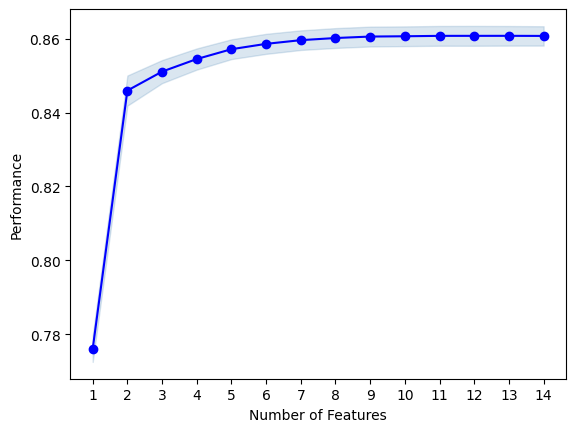

In [391]:

lr2 = LogisticRegression(random_state=1234)

sfs2 = SFS(estimator=lr2, 
           k_features=(1, X_train_woe.shape[1]),
           forward=True, 
           floating=False, 
           scoring='roc_auc',
           cv=4)


sfs2.fit(X_dev_woe, y_dev)
print('best combination (ACC: %.3f): %s\n' % (sfs2.k_score_, sfs2.k_feature_idx_))
print('all subsets:\n', sfs2.subsets_)
plot_sfs(sfs2.get_metric_dict())

In [392]:
X_train_sfs2 =  sfs2.transform(X_train_woe)
X_test_sfs2 = sfs2.transform(X_test_woe)
lr2.fit(X_train_sfs2, y_train)

LogisticRegression(random_state=1234)

In [393]:
print('train' , roc_auc_score(y_train, lr2.predict_proba(X_train_sfs2)[:,1]))
print('test' , roc_auc_score(y_test, lr2.predict_proba(X_test_sfs2)[:,1]))

train 0.8584188557852581
test 0.8658765858333621


In [139]:
print('train' , roc_auc_score(y_train, lr2.predict_proba(X_train_sfs2)[:,1]))
print('test' , roc_auc_score(y_test, lr2.predict_proba(X_test_sfs2)[:,1]))

train 0.8556449944467518
test 0.8624519319871435


In [ ]:
train 0.8584247584388535
test 0.865934925804978

In [199]:
df_dev[df_dev.MonthlyIncome.isna()].DebtRatio.mean()

1673.3965557835256

In [203]:
df_dev['Debt'] =df_dev['DebtRatio']*df_dev['MonthlyIncome'].fillna(1)

In [247]:
df_dev[df_dev['DebtRatio']>1].SeriousDlqin2yrs.mean()

0.06520192389788541

In [244]:
df_dev[(df_dev['RevolvingUtilizationOfUnsecuredLines']>1)].SeriousDlqin2yrs.mean()

0.3724781692261367

In [243]:
df_dev[(df_dev['DebtRatio']>1)  & (df_dev['RevolvingUtilizationOfUnsecuredLines']>1) ].SeriousDlqin2yrs.mean()

0.3925104022191401

In [249]:
df_dev[(df_dev['DebtRatio']>1)  & (df_dev['RevolvingUtilizationOfUnsecuredLines']>1) ]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt
162,163,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0,5980.895700
541,542,0,1.245847,24,1,499.000000,NaN,4,1,0,0,NaN,499.000000
649,650,0,1.011333,52,0,10.800499,400.0,8,0,1,0,2.0,4320.199500
789,790,1,1.008507,58,3,3265.000000,NaN,20,0,0,1,0.0,3265.000000
919,920,1,1.362142,73,1,274.000000,NaN,2,3,0,1,NaN,274.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149223,149224,1,1.007421,38,1,1.781955,664.0,8,3,0,0,2.0,1183.218045
149368,149369,1,1.020238,39,0,4208.000000,NaN,8,0,2,3,0.0,4208.000000
149663,149664,1,1.744511,49,0,1.224310,2500.0,4,4,2,1,1.0,3060.775690
149763,149764,1,1.098372,33,4,5225.000000,NaN,7,1,2,0,0.0,5225.000000


In [250]:
df_dev['NumberOfTime30+DaysPastDueNotWorse'] = df_dev[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']].sum(axis=1)

In [312]:
df_dev[df_dev['NumberOfOpenCreditLinesAndLoans'] == 0].SeriousDlqin2yrs.mean()

0.2563559322033898

In [311]:
df_dev[df_dev['NumberRealEstateLoansOrLines'] == 0].SeriousDlqin2yrs.mean()

0.08314942692389835

In [306]:
df_dev[(df_dev['NumberOfOpenCreditLinesAndLoans'] == 0) & (df_dev['NumberRealEstateLoansOrLines'] == 0)]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,flag_bad_utilization,flag_bad_dlq
176,177,0,1.0,69,0,0.005319,2255.0,0,1,0,0,3.0,11.994681,1,0,0
238,239,0,1.0,28,0,0.000000,NaN,0,0,0,0,NaN,0.000000,0,0,0
243,244,0,1.0,68,0,0.040493,6000.0,0,0,0,0,0.0,242.959506,0,0,0
331,332,0,1.0,29,0,0.000000,NaN,0,0,0,0,0.0,0.000000,0,0,0
381,382,0,1.0,22,0,130.000000,NaN,0,0,0,0,NaN,130.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149679,149680,0,1.0,59,1,0.835846,596.0,0,1,0,0,0.0,498.164154,2,0,1
149736,149737,0,1.0,35,0,1205.000000,NaN,0,0,0,0,0.0,1205.000000,0,0,0
149769,149770,0,1.0,23,98,0.000000,NaN,0,98,0,98,NaN,0.000000,294,0,1
149791,149792,0,1.0,32,0,0.000000,1000.0,0,0,0,0,2.0,0.000000,0,0,0


In [302]:
df_dev[df_dev['RevolvingUtilizationOfUnsecuredLines'] == 1.0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,flag_bad_utilization,flag_bad_dlq
2710,2711,0,1.0,23,1,0.566038,900.0,4,0,0,0,0.0,509.433962,1,0,0
28224,28225,1,1.0,59,1,0.085413,2083.0,1,0,0,0,0.0,177.914587,1,0,0
33367,33368,1,1.0,48,0,0.628058,2615.0,9,0,0,0,0.0,1642.371942,0,0,0
42661,42662,0,1.0,44,1,0.317996,4650.0,6,0,0,0,3.0,1478.682004,1,0,0
45242,45243,0,1.0,32,0,0.052076,4166.0,2,1,0,0,0.0,216.947924,1,0,0
45894,45895,0,1.0,39,0,0.931165,3166.0,3,0,2,0,0.0,2948.068836,0,0,0
58607,58608,1,1.0,27,0,0.268362,4560.0,6,2,1,0,2.0,1223.731637,2,0,1
60254,60255,0,1.0,43,0,0.148427,4641.0,3,0,0,0,1.0,688.851573,0,0,0
71527,71528,0,1.0,40,0,0.977778,3824.0,14,0,1,0,5.0,3739.022223,0,0,0
71863,71864,0,1.0,62,1,0.209772,3908.0,3,1,1,0,0.0,819.790227,2,0,1


In [316]:
df_dev['avg_debt_per_credit'] =  np.where( df_dev['NumberOfOpenCreditLinesAndLoans']>0, df_dev['Debt']/df_dev['NumberOfOpenCreditLinesAndLoans'], np.nan)

In [313]:
df_dev['flag_bad_utilization'] = np.where(df_dev['RevolvingUtilizationOfUnsecuredLines']>1, 1, 0)
df_dev['flag_bad_dlq'] = np.where(df_dev['NumberOfTime30+DaysPastDueNotWorse']>1, 1, 0)
df_dev['flag_bad_noopencreds'] = np.where(df_dev['NumberOfOpenCreditLinesAndLoans']== 0, 1, 0)

In [314]:
df_dev[['flag_bad_utilization', 'flag_bad_dlq','flag_bad_noopencreds']].value_counts()

flag_bad_utilization  flag_bad_dlq  flag_bad_noopencreds
0                     0             0                       133724
                      1             0                        11075
1                     0             0                         1786
                      1             0                         1527
0                     0             1                         1365
                      1             1                          515
1                     0             1                            5
                      1             1                            3
dtype: int64

In [315]:
pd.pivot_table(df_dev, index=['flag_bad_utilization', 'flag_bad_dlq', 'flag_bad_noopencreds'], values='SeriousDlqin2yrs', aggfunc=['count', 'mean'])

count  \
                                                       SeriousDlqin2yrs   
flag_bad_utilization flag_bad_dlq flag_bad_noopencreds                    
0                    0            0                              133724   
                                  1                                1365   
                     1            0                               11075   
                                  1                                 515   
1                    0            0                                1786   
                                  1                                   5   
                     1            0                                1527   
                                  1                                   3   

                                                                   mean  
                                                       SeriousDlqin2yrs  
flag_bad_utilization flag_bad_dlq flag_bad_noopencreds                   
0                    0            0                            0.035528  
                                  1                            0.175824  
                     1            0                            0.320993  
                                  1                            0.471845  
1                    0            0                            0.212206  
                                  1                            0.000000  
                     1            0                            0.561231  
                                  1                            0.333333

In [339]:
def get_killer_feature(df):
    df_ = df.copy(deep=True)
    for x in ['flag_bad_utilization', 'flag_bad_dlq', 'flag_bad_noopencreds']:
        df_[x+'_modified'] = x +'='+ df_[x].astype(str) + '&'
    df_['feat_killer'] = df_[[x for x in df_ if '_modified' in x]].sum(axis=1)
    return df_['feat_killer']


In [341]:
get_killer_feature(df_dev).value_counts()

flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&    133724
flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=0&     11075
flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&      1786
flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=0&      1527
flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&      1365
flag_bad_utilization=0&flag_bad_dlq=1&flag_bad_noopencreds=1&       515
flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=1&         5
flag_bad_utilization=1&flag_bad_dlq=1&flag_bad_noopencreds=1&         3
Name: feat_killer, dtype: int64

In [283]:
df_dev.age.value_counts().sort_index()

0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64

In [281]:
df_dev.age

0         45
1         40
2         38
3         30
4         49
          ..
149995    74
149996    44
149997    58
149998    30
149999    64
Name: age, Length: 150000, dtype: int64

In [279]:
df_dev[df_dev.age<25].SeriousDlqin2yrs.mean()

0.10457831325301205

In [200]:
df_dev[~df_dev.MonthlyIncome.isna()].DebtRatio.mean()

26.598777445397225

In [ ]:
train 0.8556449944467518
test 0.8624519319871435

In [ ]:
train 0.8584247584388535
test 0.865934925804978

# Test

In [7]:
import pickle
import pandas as pd
import numpy as np
from optbinning import Scorecard
from optbinning.scorecard import ScorecardMonitoring
from optbinning.scorecard import plot_auc_roc, plot_ks
from optbinning import BinningProcess
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [2]:
with open('/docker_disk/risk-model/data/06_models/bp_short_list.pkl', 'rb') as f:
    bp_short = pickle.load(f)

In [3]:
bp_short.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,RevolvingUtilizationOfUnsecuredLines,numerical,OPTIMAL,True,9,1.103435,0.129002,0.550069,0.078887
1,age,numerical,OPTIMAL,True,13,0.247929,0.030155,0.266161,0.06418
2,NumberOfTime30-59DaysPastDueNotWorse,numerical,OPTIMAL,True,3,0.730531,0.083827,0.373414,0.194107
3,DebtRatio,numerical,OPTIMAL,True,8,0.076287,0.009435,0.140361,0.069217
4,MonthlyIncome,numerical,OPTIMAL,True,9,0.084096,0.010434,0.162747,0.059066
5,NumberOfOpenCreditLinesAndLoans,numerical,OPTIMAL,True,9,0.076655,0.009439,0.131937,0.086861
6,NumberOfTimes90DaysLate,numerical,OPTIMAL,True,2,0.827181,0.087874,0.308549,0.053938
7,NumberRealEstateLoansOrLines,numerical,OPTIMAL,True,4,0.054017,0.006736,0.120432,0.178578
8,NumberOfTime60-89DaysPastDueNotWorse,numerical,OPTIMAL,True,2,0.562093,0.061201,0.239517,0.110152
9,NumberOfDependents,numerical,OPTIMAL,True,4,0.028749,0.003584,0.087988,0.085201


In [4]:
X_train = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/X_train.pkl')
y_train = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/y_train.pkl')
X_test = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/X_test.pkl')
y_test = pd.read_pickle('/docker_disk/risk-model/data/05_model_input/y_test.pkl')

In [5]:
 with open('/docker_disk/risk-model/data/06_models/scorecard.pkl', 'rb') as f:
    scorecard = pickle.load(f)

In [6]:
weights = {}
weights['const'] = np.round(scorecard.estimator_.intercept_[0],4)
weights['features'] = dict(zip(scorecard.estimator_.feature_names_in_, np.round(scorecard.estimator_.coef_[0],4)))


In [7]:
weights

{'const': -2.634,
 'features': {'RevolvingUtilizationOfUnsecuredLines': -0.5798,
  'age': -0.3844,
  'NumberOfTime30-59DaysPastDueNotWorse': -0.0543,
  'DebtRatio': -0.6524,
  'MonthlyIncome': -0.363,
  'NumberOfOpenCreditLinesAndLoans': -0.029,
  'NumberOfTimes90DaysLate': -0.3111,
  'NumberRealEstateLoansOrLines': -0.5106,
  'NumberOfTime60-89DaysPastDueNotWorse': -0.2151,
  'NumberOfDependents': -0.1393,
  'Debt': -0.9326,
  'NumberOfTime30+DaysPastDueNotWorse': -0.4745,
  'feat_killer': -0.0719}}

In [10]:
df_dev = pd.read_pickle('/docker_disk/risk-model/data/04_feature/df_dev.pkl')
df_dev

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,flag_bad_utilization,flag_bad_dlq,flag_bad_noopencreds,feat_killer
Id,,,,,,,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,7323.197016,2,563.322847,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,316.878123,0,79.219531,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,258.914887,2,129.457443,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,118.963951,0,23.792790,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1584.975094,1,226.425013,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,472.774869,0,118.193717,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,4001.283436,0,1000.320859,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,3870.000000,0,215.000000,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...


In [40]:
df_dev['type_sample'] = np.NaN
df_dev.loc[df_dev.index.intersection(X_train.index), 'type_sample'] = 'train'
df_dev.loc[df_dev.index.intersection(X_test.index), 'type_sample'] = 'test'

In [43]:
df_dev['type_sample'].value_counts()

train    100500
test      49500
Name: type_sample, dtype: int64

In [18]:
roc_auc_score(df_dev['SeriousDlqin2yrs'], scorecard.predict_proba(df_dev)[:,1])

0.8610396817418124

In [17]:
2*roc_auc_score(df_dev['SeriousDlqin2yrs'], scorecard.predict_proba(df_dev)[:,1])-1

0.7220793634836249

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,feat_killer
Id,,,,,,,,,,,,,
1,-0.849902,-0.207740,-1.906763,-0.640343,0.278369,0.113931,0.385057,-0.223238,0.285265,-0.199244,-0.442829,-2.035856,-1.884888
2,-1.385751,-0.305992,0.533430,0.105503,-0.405582,0.054586,0.385057,-0.237329,0.285265,-0.081579,0.001238,0.927038,0.657791
3,-0.359879,-0.305992,-0.873570,0.105503,-0.405582,-0.690735,-2.295820,-0.237329,0.285265,0.121467,0.001238,-2.035856,-1.884888
4,0.608288,-0.537419,0.533430,0.105503,-0.405582,0.054586,0.385057,-0.237329,0.285265,0.121467,0.001238,0.927038,0.657791
5,-1.385751,-0.146406,-0.873570,0.105503,0.511938,0.167859,0.385057,0.258697,0.285265,0.121467,0.001238,-0.648565,0.657791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,1.364335,0.980021,0.533430,0.105503,-0.489821,0.054586,0.385057,0.258697,0.285265,0.121467,0.001238,0.927038,0.657791
149997,0.608288,-0.207740,0.533430,-0.345131,-0.026922,0.054586,0.385057,0.258697,0.285265,-0.199244,-0.105629,0.927038,0.657791
149998,0.608288,0.263528,0.533430,0.291419,0.000000,-0.066665,0.385057,0.258697,0.285265,0.121467,-0.105629,0.927038,0.657791


{'RevolvingUtilizationOfUnsecuredLines': 'RevolvingUtilizationOfUnsecuredLines_woe',
 'age': 'age_woe',
 'NumberOfTime30-59DaysPastDueNotWorse': 'NumberOfTime30-59DaysPastDueNotWorse_woe',
 'DebtRatio': 'DebtRatio_woe',
 'MonthlyIncome': 'MonthlyIncome_woe',
 'NumberOfOpenCreditLinesAndLoans': 'NumberOfOpenCreditLinesAndLoans_woe',
 'NumberOfTimes90DaysLate': 'NumberOfTimes90DaysLate_woe',
 'NumberRealEstateLoansOrLines': 'NumberRealEstateLoansOrLines_woe',
 'NumberOfTime60-89DaysPastDueNotWorse': 'NumberOfTime60-89DaysPastDueNotWorse_woe',
 'NumberOfDependents': 'NumberOfDependents_woe',
 'Debt': 'Debt_woe',
 'NumberOfTime30+DaysPastDueNotWorse': 'NumberOfTime30+DaysPastDueNotWorse_woe',
 'feat_killer': 'feat_killer_woe'}

['RevolvingUtilizationOfUnsecuredLines_woe',
 'age_woe',
 'NumberOfTime30-59DaysPastDueNotWorse_woe',
 'DebtRatio_woe',
 'MonthlyIncome_woe',
 'NumberOfOpenCreditLinesAndLoans_woe',
 'NumberOfTimes90DaysLate_woe',
 'NumberRealEstateLoansOrLines_woe',
 'NumberOfTime60-89DaysPastDueNotWorse_woe',
 'NumberOfDependents_woe',
 'Debt_woe',
 'NumberOfTime30+DaysPastDueNotWorse_woe',
 'feat_killer_woe']

In [27]:
scorecard.binning_process_.transform(df_dev, metric='bins')

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,feat_killer
Id,,,,,,,,,,,,,
1,"[0.70, 0.88)","[43.50, 47.50)","[1.50, inf)","[0.72, 2.66)","[8559.50, 9941.50)","[9.50, 13.50)","(-inf, 0.50)","[2.50, inf)","(-inf, 0.50)","[1.50, 2.50)","[5240.16, inf)","[1.50, inf)",['flag_bad_utilization=0&flag_bad_dlq=1&flag_b...
2,"[0.88, inf)","[37.50, 43.50)","(-inf, 0.50)","[0.02, 0.34)","[2485.50, 3332.50)","[3.50, 5.50)","(-inf, 0.50)","(-inf, 0.50)","(-inf, 0.50)","[0.50, 1.50)","[98.00, 3790.87)","(-inf, 0.50)",['flag_bad_utilization=0&flag_bad_dlq=0&flag_b...
3,"[0.49, 0.70)","[37.50, 43.50)","[0.50, 1.50)","[0.02, 0.34)","[2485.50, 3332.50)","(-inf, 2.50)","[0.50, inf)","(-inf, 0.50)","(-inf, 0.50)","(-inf, 0.50)","[98.00, 3790.87)","[1.50, inf)",['flag_bad_utilization=0&flag_bad_dlq=1&flag_b...
4,"[0.22, 0.30)","[29.50, 33.50)","(-inf, 0.50)","[0.02, 0.34)","[2485.50, 3332.50)","[3.50, 5.50)","(-inf, 0.50)","(-inf, 0.50)","(-inf, 0.50)","(-inf, 0.50)","[98.00, 3790.87)","(-inf, 0.50)",['flag_bad_utilization=0&flag_bad_dlq=0&flag_b...
5,"[0.88, inf)","[47.50, 49.50)","[0.50, 1.50)","[0.02, 0.34)","[9941.50, inf)","[5.50, 7.50)","(-inf, 0.50)","[0.50, 1.50)","(-inf, 0.50)","(-inf, 0.50)","[98.00, 3790.87)","[0.50, 1.50)",['flag_bad_utilization=0&flag_bad_dlq=0&flag_b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"(-inf, 0.06)","[67.50, 74.50)","(-inf, 0.50)","[0.02, 0.34)","[1533.50, 2485.50)","[3.50, 5.50)","(-inf, 0.50)","[0.50, 1.50)","(-inf, 0.50)","(-inf, 0.50)","[98.00, 3790.87)","(-inf, 0.50)",['flag_bad_utilization=0&flag_bad_dlq=0&flag_b...
149997,"[0.22, 0.30)","[43.50, 47.50)","(-inf, 0.50)","[0.51, 0.72)","[4838.50, 6596.50)","[3.50, 5.50)","(-inf, 0.50)","[0.50, 1.50)","(-inf, 0.50)","[1.50, 2.50)","[3790.87, 5240.16)","(-inf, 0.50)",['flag_bad_utilization=0&flag_bad_dlq=0&flag_b...
149998,"[0.22, 0.30)","[55.50, 59.50)","(-inf, 0.50)","[709.50, inf)",Missing,"[17.50, inf)","(-inf, 0.50)","[0.50, 1.50)","(-inf, 0.50)","(-inf, 0.50)","[3790.87, 5240.16)","(-inf, 0.50)",['flag_bad_utilization=0&flag_bad_dlq=0&flag_b...


In [16]:
lr = LogisticRegression(random_state=1234)

scorecard = Scorecard(binning_process=bp_short,
                  estimator=lr, 
                  scaling_method=None,
                  )
    

In [23]:
X_train_woe_short.corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,feat_killer
RevolvingUtilizationOfUnsecuredLines,1.000000,0.275789,0.260571,0.146251,0.116707,0.217721,0.276667,0.088882,0.211934,0.100716,0.118525,0.338550,0.383497
age,0.275789,1.000000,0.102032,0.089056,0.089328,0.067137,0.101034,0.020313,0.082964,0.270039,0.113153,0.135270,0.129504
NumberOfTime30-59DaysPastDueNotWorse,0.260571,0.102032,1.000000,0.084048,0.033845,-0.012225,0.266807,0.000255,0.299689,0.075163,0.092635,0.869148,0.674223
DebtRatio,0.146251,0.089056,0.084048,1.000000,0.206816,-0.143770,-0.001608,-0.166177,0.029745,0.125893,0.381561,0.070432,0.034522
MonthlyIncome,0.116707,0.089328,0.033845,0.206816,1.000000,0.099369,0.083065,0.141679,0.054643,-0.082559,-0.246381,0.066900,0.075507
NumberOfOpenCreditLinesAndLoans,0.217721,0.067137,-0.012225,-0.143770,0.099369,1.000000,0.153821,0.288652,0.052567,-0.111035,-0.284710,0.064955,0.131006
NumberOfTimes90DaysLate,0.276667,0.101034,0.266807,-0.001608,0.083065,0.153821,1.000000,0.084153,0.315040,0.028644,-0.031224,0.555881,0.544127
NumberRealEstateLoansOrLines,0.088882,0.020313,0.000255,-0.166177,0.141679,0.288652,0.084153,1.000000,0.035292,-0.129357,-0.271880,0.040269,0.074332
NumberOfTime60-89DaysPastDueNotWorse,0.211934,0.082964,0.299689,0.029745,0.054643,0.052567,0.315040,0.035292,1.000000,0.035480,0.015077,0.531996,0.498061
NumberOfDependents,0.100716,0.270039,0.075163,0.125893,-0.082559,-0.111035,0.028644,-0.129357,0.035480,1.000000,0.200496,0.077817,0.051341


In [17]:
scorecard.fit(X_train[list(bp_short.variable_names)], y_train)

Scorecard(binning_process=BinningProcess(binning_fit_params={'feat_killer': {'user_splits': array([list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=0&']),
       list(['flag_bad_utilization=0&flag_bad_dlq=0&flag_bad_noopencreds=1&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad_noopencreds=0&', 'flag_bad_utilization=1&flag_bad_dlq=0&flag_bad...
                                         variable_names=['RevolvingUtilizationOfUnsecuredLines',
                                                         'age',
                                                         'NumberOfTime30-59DaysPastDueNotWorse',
                                                         'DebtRatio',
                                                         'MonthlyIncome',
                                                         'NumberOfOpenCreditLinesAndLoans',
                                                         'NumberOfTimes90DaysLate',
                                                         'NumberRealEstateLoansOrLines',
                                                         'NumberOfTime60-89DaysPastDueNotWorse',
                                                         'NumberOfDependents',
                                                         'Debt',
                                                         'NumberOfTime30+DaysPastDueNotWorse',
                                                         'feat_killer']),
          estimator=LogisticRegression(random_state=1234))

In [22]:
scorecard.estimator_.feature_names_in_

array(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'Debt', 'NumberOfTime30+DaysPastDueNotWorse', 'feat_killer'],
      dtype=object)

In [21]:
scorecard.estimator_.coef_

array([[-0.57976938, -0.38444183, -0.05430571, -0.652369  , -0.36296514,
        -0.02899693, -0.31111878, -0.51064299, -0.21511281, -0.13933663,
        -0.93261067, -0.47454779, -0.07191289]])

In [56]:
df_validation = pd.read_pickle('/docker_disk/risk-model/data/04_feature/df_validation.pkl')
df_validation

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt,NumberOfTime30+DaysPastDueNotWorse,avg_debt_per_credit,flag_bad_utilization,flag_bad_dlq,flag_bad_noopencreds,feat_killer
Id,,,,,,,,,,,,,,,,,,
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,1011.822487,0,252.955622,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,4819.472759,0,321.298184,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,3495.312354,0,291.276030,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,2963.074038,1,423.296291,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,76.980082,0,19.245021,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0,95.931478,0,19.186296,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0,7114.065783,3,889.258223,0,1,0,flag_bad_utilization=0&flag_bad_dlq=1&flag_bad...
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN,836.000000,0,278.666667,0,0,0,flag_bad_utilization=0&flag_bad_dlq=0&flag_bad...


In [57]:
def get_result_to_kaggle(df:pd.DataFrame, scorecard):
    """
    result: upload to Kaggle
    """
    df['Probability'] = scorecard.predict_proba(df)[:,1]

    return df.reset_index()[['Id', 'Probability']]

In [58]:
aa = get_result_to_kaggle(df_validation, scorecard)

In [59]:
aa

,Id,Probability
0,1,0.085655
1,2,0.044671
2,3,0.016341
3,4,0.091909
4,5,0.080937
...,...,...
101498,101499,0.025233
101499,101500,0.510247
101500,101501,0.011287
101501,101502,0.070739


In [4]:
df_valid = pd.read_pickle('/docker_disk/risk-model/data/07_model_output/df_validation_scored.pkl')
df_dev = pd.read_pickle('/docker_disk/risk-model/data/07_model_output/df_dev_scored.pkl')

In [5]:
df_valid

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,MonthlyIncome_woe,NumberOfOpenCreditLinesAndLoans_woe,NumberOfTimes90DaysLate_woe,NumberRealEstateLoansOrLines_woe,NumberOfTime60-89DaysPastDueNotWorse_woe,NumberOfDependents_woe,Debt_woe,NumberOfTime30+DaysPastDueNotWorse_woe,feat_killer_woe,prediction
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,...,-0.026922,0.054586,0.385057,-0.237329,0.285265,0.121467,0.001238,0.927038,0.657791,0.085655
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,...,0.278369,-0.008285,0.385057,-0.223238,0.285265,-0.199244,-0.105629,0.927038,0.657791,0.044671
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,...,-0.026922,0.113931,0.385057,0.258697,0.285265,-0.199244,0.001238,0.927038,0.657791,0.016341
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,...,-0.405582,0.167859,0.385057,0.176682,0.285265,0.121467,0.001238,-0.648565,0.657791,0.091909
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,...,-0.217819,0.054586,0.385057,-0.237329,0.285265,-0.081579,0.315058,0.927038,0.657791,0.080937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,...,-0.107704,0.054586,0.385057,-0.237329,0.285265,0.121467,0.315058,0.927038,0.657791,0.025233
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,...,0.237213,0.368331,0.385057,0.176682,0.285265,-0.317711,-0.442829,-2.035856,-1.884888,0.510247
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,...,0.176166,-0.168630,0.385057,-0.237329,0.285265,0.396383,0.001238,0.927038,0.657791,0.011287


In [13]:
df_dev

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,MonthlyIncome_woe,NumberOfOpenCreditLinesAndLoans_woe,NumberOfTimes90DaysLate_woe,NumberRealEstateLoansOrLines_woe,NumberOfTime60-89DaysPastDueNotWorse_woe,NumberOfDependents_woe,Debt_woe,NumberOfTime30+DaysPastDueNotWorse_woe,feat_killer_woe,prediction
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,0.278369,0.113931,0.385057,-0.223238,0.285265,-0.199244,-0.442829,-2.035856,-1.884888,0.457789
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,-0.405582,0.054586,0.385057,-0.237329,0.285265,-0.081579,0.001238,0.927038,0.657791,0.099558
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,-0.405582,-0.690735,-2.295820,-0.237329,0.285265,0.121467,0.001238,-2.035856,-1.884888,0.424524
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,-0.405582,0.054586,0.385057,-0.237329,0.285265,0.121467,0.001238,0.927038,0.657791,0.035655
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,0.511938,0.167859,0.385057,0.258697,0.285265,0.121467,0.001238,-0.648565,0.657791,0.113318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,-0.489821,0.054586,0.385057,0.258697,0.285265,0.121467,0.001238,0.927038,0.657791,0.010540
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,-0.026922,0.054586,0.385057,0.258697,0.285265,-0.199244,-0.105629,0.927038,0.657791,0.033032
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,...,0.176166,-0.066665,0.385057,0.258697,0.285265,0.121467,-0.105629,0.927038,0.657791,0.017566


In [10]:
bp_short.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,RevolvingUtilizationOfUnsecuredLines,numerical,OPTIMAL,True,9,1.103435,0.129002,0.550069,0.078887
1,age,numerical,OPTIMAL,True,13,0.247929,0.030155,0.266161,0.06418
2,NumberOfTime30-59DaysPastDueNotWorse,numerical,OPTIMAL,True,3,0.730531,0.083827,0.373414,0.194107
3,DebtRatio,numerical,OPTIMAL,True,8,0.076287,0.009435,0.140361,0.069217
4,MonthlyIncome,numerical,OPTIMAL,True,9,0.084096,0.010434,0.162747,0.059066
5,NumberOfOpenCreditLinesAndLoans,numerical,OPTIMAL,True,9,0.076655,0.009439,0.131937,0.086861
6,NumberOfTimes90DaysLate,numerical,OPTIMAL,True,2,0.827181,0.087874,0.308549,0.053938
7,NumberRealEstateLoansOrLines,numerical,OPTIMAL,True,4,0.054017,0.006736,0.120432,0.178578
8,NumberOfTime60-89DaysPastDueNotWorse,numerical,OPTIMAL,True,2,0.562093,0.061201,0.239517,0.110152
9,NumberOfDependents,numerical,OPTIMAL,True,4,0.028749,0.003584,0.087988,0.085201


In [55]:
table_info_train_gini = {}
table_info_test_gini = {}

In [64]:
table_gini_train_test = pd.DataFrame([])
for type_sampe in ['train', 'test']:
    table_info_gini = {}
    
    for feature_woe in [ x for x in df_dev.columns if 'woe' in x]:
        table_info_gini[feature_woe] = (2*roc_auc_score(df_dev[df_dev.type_sample == type_sampe]['SeriousDlqin2yrs'], 
                                                        df_dev[df_dev.type_sample == type_sampe][feature_woe]) - 1) * (-1)
    
    table_gini_train_test = pd.concat([table_gini_train_test, pd.DataFrame.from_dict(table_info_gini, orient='index', columns=['gini_{}'.format(type_sampe)])], axis=1)
table_gini_train_test = table_gini_train_test.reset_index().rename(columns = {'index':'name'})
table_gini_train_test['name'] = table_gini_train_test['name'].str.replace('_woe','', regex=True)

In [65]:
table_gini_train_test

,name,gini_train,gini_test
0,RevolvingUtilizationOfUnsecuredLines,0.550069,0.556348
1,age,0.266161,0.279462
2,NumberOfTime30-59DaysPastDueNotWorse,0.373414,0.385160
3,DebtRatio,0.140361,0.140250
4,MonthlyIncome,0.162747,0.151766
5,NumberOfOpenCreditLinesAndLoans,0.131937,0.149911
6,NumberOfTimes90DaysLate,0.308549,0.317639
7,NumberRealEstateLoansOrLines,0.120432,0.120025
8,NumberOfTime60-89DaysPastDueNotWorse,0.239517,0.246295
9,NumberOfDependents,0.087988,0.118301


In [26]:
pd.DataFrame.from_dict(table_info_train_gini, orient='index', columns=['gini_train'])

,gini_train
RevolvingUtilizationOfUnsecuredLines_woe,0.550069
age_woe,0.266161
NumberOfTime30-59DaysPastDueNotWorse_woe,0.373414
DebtRatio_woe,0.140361
MonthlyIncome_woe,0.162747
NumberOfOpenCreditLinesAndLoans_woe,0.131937
NumberOfTimes90DaysLate_woe,0.308549
NumberRealEstateLoansOrLines_woe,0.120432
NumberOfTime60-89DaysPastDueNotWorse_woe,0.239517
NumberOfDependents_woe,0.087988


In [73]:
def get_table_features_quality(bp_short, df_dev_scored, target):
    """get features quality (IV, Gini)
    """
    table_info_from_binning = bp_short.summary()

    table_gini_train_test = pd.DataFrame([])
    for type_sampe in ['train', 'test']:
        table_info_gini = {}

        for feature_woe in [ x for x in df_dev_scored.columns if 'woe' in x]:
            table_info_gini[feature_woe] = (2*roc_auc_score(df_dev_scored[df_dev_scored.type_sample == type_sampe][target], 
                                                            df_dev_scored[df_dev_scored.type_sample == type_sampe][feature_woe]) - 1) * (-1)

        table_gini_train_test = pd.concat([table_gini_train_test, pd.DataFrame.from_dict(table_info_gini, orient='index', columns=['gini_{}'.format(type_sampe)])], axis=1)
    table_gini_train_test = table_gini_train_test.reset_index().rename(columns = {'index':'name'})
    table_gini_train_test['name'] = table_gini_train_test['name'].str.replace('_woe','', regex=True)

    table = table_info_from_binning.merge(table_gini_train_test, how='left', on = 'name')
    return table

In [74]:
get_table_features_quality(bp_short, df_dev, target = 'SeriousDlqin2yrs')

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score,gini_train,gini_test
0,RevolvingUtilizationOfUnsecuredLines,numerical,OPTIMAL,True,9,1.103435,0.129002,0.550069,0.078887,0.550069,0.556348
1,age,numerical,OPTIMAL,True,13,0.247929,0.030155,0.266161,0.06418,0.266161,0.279462
2,NumberOfTime30-59DaysPastDueNotWorse,numerical,OPTIMAL,True,3,0.730531,0.083827,0.373414,0.194107,0.373414,0.385160
3,DebtRatio,numerical,OPTIMAL,True,8,0.076287,0.009435,0.140361,0.069217,0.140361,0.140250
4,MonthlyIncome,numerical,OPTIMAL,True,9,0.084096,0.010434,0.162747,0.059066,0.162747,0.151766
5,NumberOfOpenCreditLinesAndLoans,numerical,OPTIMAL,True,9,0.076655,0.009439,0.131937,0.086861,0.131937,0.149911
6,NumberOfTimes90DaysLate,numerical,OPTIMAL,True,2,0.827181,0.087874,0.308549,0.053938,0.308549,0.317639
7,NumberRealEstateLoansOrLines,numerical,OPTIMAL,True,4,0.054017,0.006736,0.120432,0.178578,0.120432,0.120025
8,NumberOfTime60-89DaysPastDueNotWorse,numerical,OPTIMAL,True,2,0.562093,0.061201,0.239517,0.110152,0.239517,0.246295
9,NumberOfDependents,numerical,OPTIMAL,True,4,0.028749,0.003584,0.087988,0.085201,0.087988,0.118301


In [77]:
import seaborn as sns

,RevolvingUtilizationOfUnsecuredLines_woe,age_woe,NumberOfTime30-59DaysPastDueNotWorse_woe,DebtRatio_woe,MonthlyIncome_woe,NumberOfOpenCreditLinesAndLoans_woe,NumberOfTimes90DaysLate_woe,NumberRealEstateLoansOrLines_woe,NumberOfTime60-89DaysPastDueNotWorse_woe,NumberOfDependents_woe,Debt_woe,NumberOfTime30+DaysPastDueNotWorse_woe,feat_killer_woe
RevolvingUtilizationOfUnsecuredLines_woe,1.00,0.28,0.26,0.14,0.12,0.22,0.28,0.09,0.21,0.10,0.12,0.34,0.39
age_woe,0.28,1.00,0.10,0.09,0.09,0.07,0.10,0.02,0.09,0.27,0.12,0.14,0.13
NumberOfTime30-59DaysPastDueNotWorse_woe,0.26,0.10,1.00,0.08,0.03,-0.01,0.27,0.00,0.30,0.07,0.09,0.87,0.67
DebtRatio_woe,0.14,0.09,0.08,1.00,0.21,-0.14,-0.00,-0.17,0.03,0.13,0.38,0.07,0.03
MonthlyIncome_woe,0.12,0.09,0.03,0.21,1.00,0.10,0.08,0.14,0.05,-0.08,-0.24,0.07,0.08
NumberOfOpenCreditLinesAndLoans_woe,0.22,0.07,-0.01,-0.14,0.10,1.00,0.15,0.29,0.05,-0.11,-0.29,0.06,0.13
NumberOfTimes90DaysLate_woe,0.28,0.10,0.27,-0.00,0.08,0.15,1.00,0.08,0.31,0.03,-0.03,0.56,0.55
NumberRealEstateLoansOrLines_woe,0.09,0.02,0.00,-0.17,0.14,0.29,0.08,1.00,0.04,-0.13,-0.27,0.04,0.07
NumberOfTime60-89DaysPastDueNotWorse_woe,0.21,0.09,0.30,0.03,0.05,0.05,0.31,0.04,1.00,0.04,0.01,0.53,0.50
NumberOfDependents_woe,0.10,0.27,0.07,0.13,-0.08,-0.11,0.03,-0.13,0.04,1.00,0.20,0.08,0.05


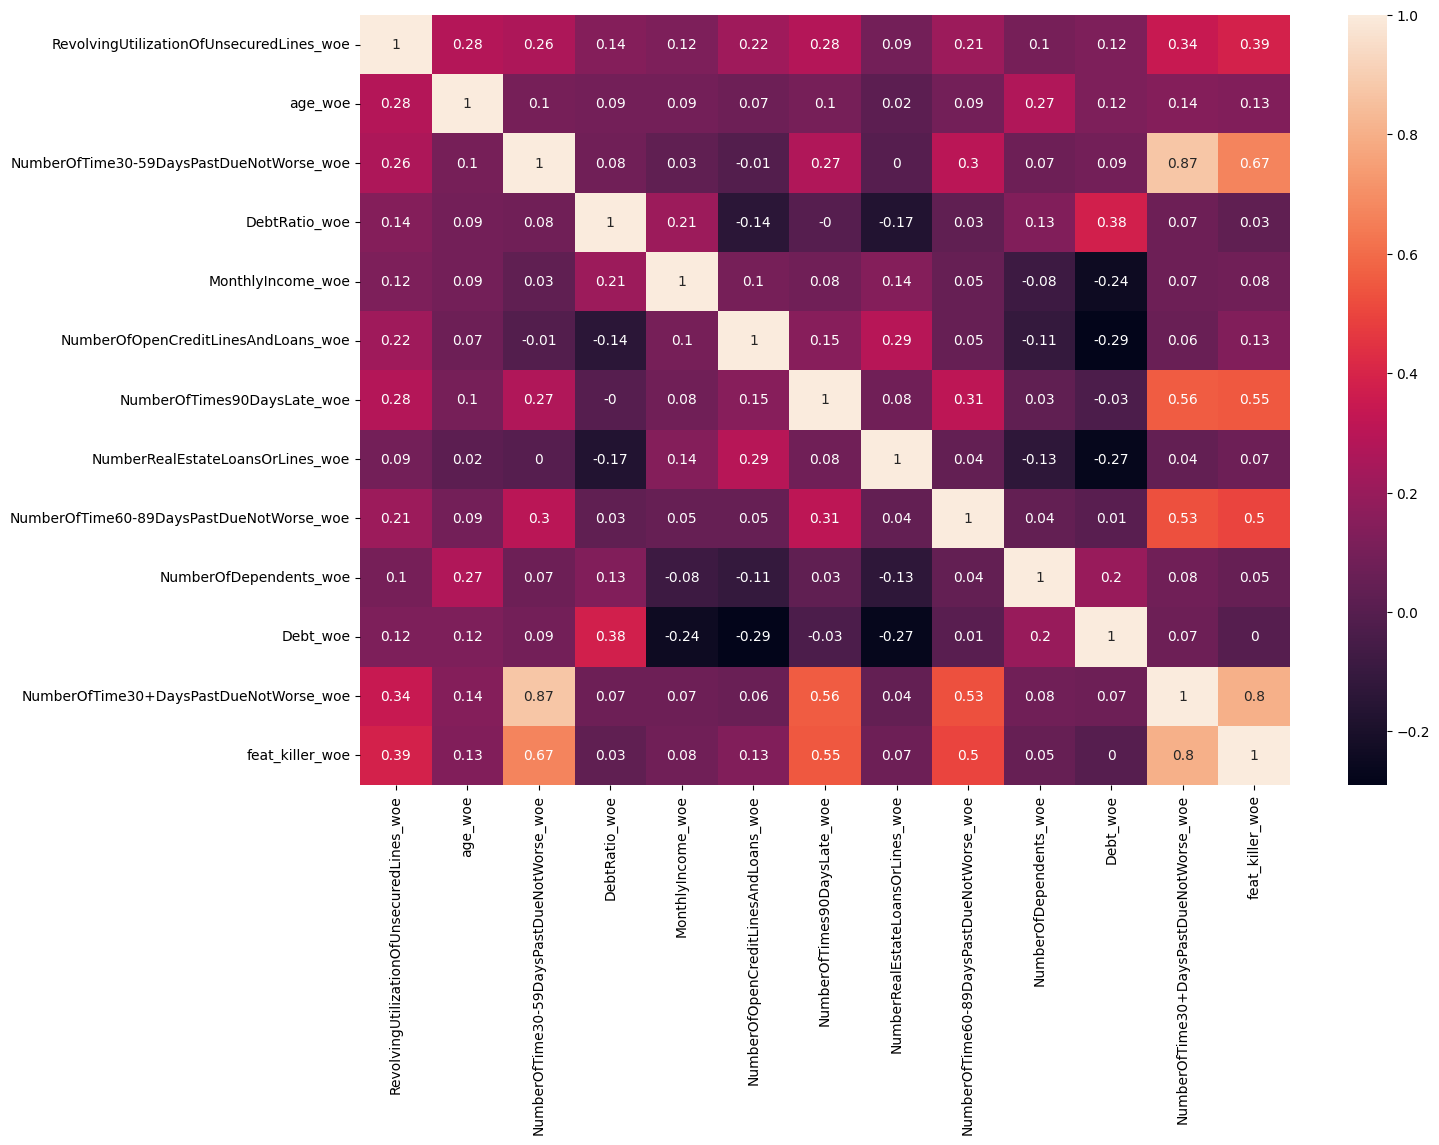

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10)) 
fig = sns.heatmap(df_dev[[x for x in df_dev.columns if 'woe' in x]].corr().round(2), annot=True)

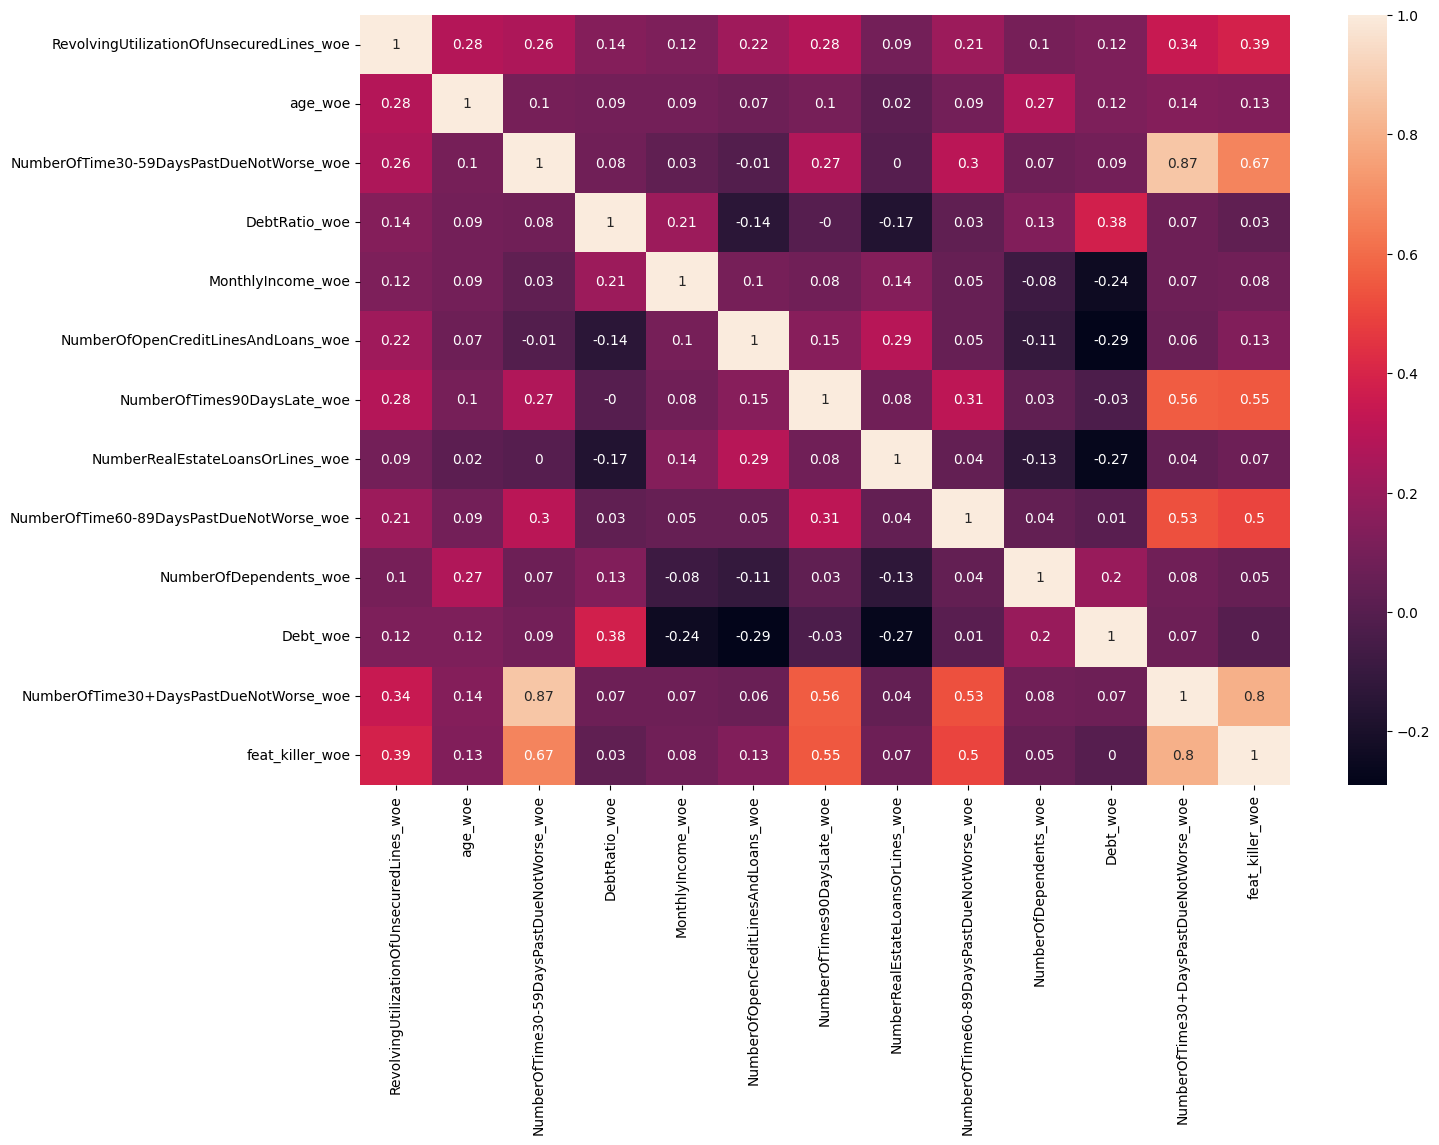

In [94]:
fig.get_figure()

In [125]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [126]:
with open('/docker_disk/risk-model/data/06_models/sfs.pkl', 'rb') as f:
    sfs = pickle.load(f)

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


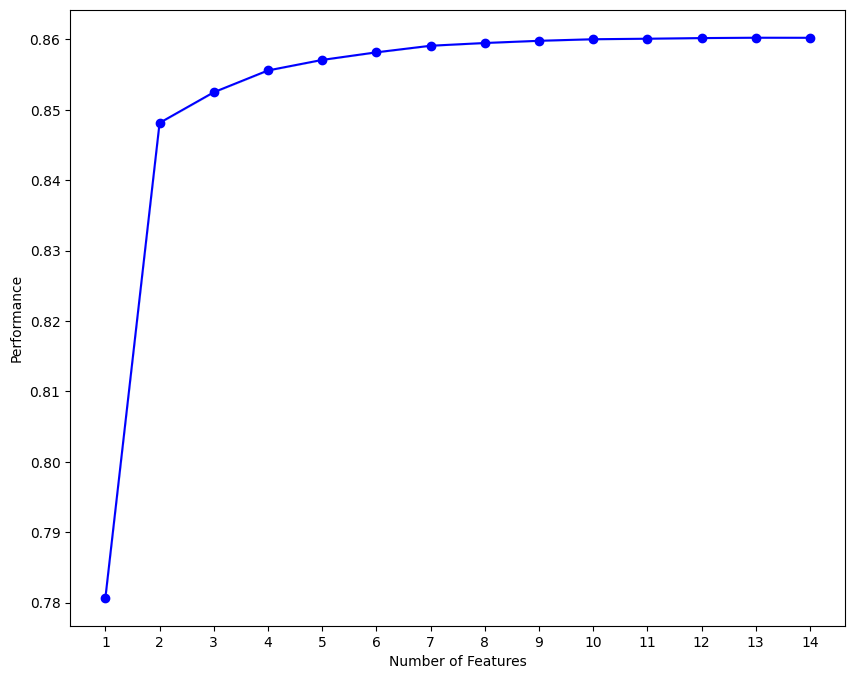

In [141]:
plot = plot_sfs(sfs.get_metric_dict(),figsize=(10, 8))[0]